In [1]:
# Initialize Otter
import otter
grader = otter.Notebook("hw5.ipynb")

# CPSC 330 - Applied Machine Learning 

## Homework 5: Putting it all together 
### Associated lectures: All material till lecture 13 

**Due date: Monday, October 31st, 2022 at 11:59pm**

Team Members:
- Vivaan Wadhwa
- Apram Ahuja
- Aryan Ballani
- Ankur Bhardwaj

## Table of contents
0. [Submission instructions](#si)
1. [Understanding the problem](#1)
2. [Data splitting](#2)
3. [EDA](#3)
4. (Challenging) [Feature engineering](#4)
5. [Preprocessing and transformations](#5) 
6. [Baseline model](#6)
7. [Linear models](#7)
8. [Different models](#8)
9. (Challenging) [Feature selection](#9)
10. [Hyperparameter optimization](#10)
11. [Interpretation and feature importances](#11) 
12. [Results on the test set](#12)
13. [Summary of the results](#13)
14. (Challenging) [Your takeaway from the course](#15)

## Instructions
<hr>
rubric={points:6}

Follow the [homework submission instructions](https://ubc-cs.github.io/cpsc330-2023W1/docs/homework_instructions.html). 

**You may work with a partner on this homework and submit your assignment as a group.** Below are some instructions on working as a group.  
- The maximum group size is 4. 
- Use group work as an opportunity to collaborate and learn new things from each other. 
- Be respectful to each other and make sure you understand all the concepts in the assignment well. 
- It's your responsibility to make sure that the assignment is submitted by one of the group members before the deadline.
- You can find the instructions on how to do group submission on Gradescope [here](https://help.gradescope.com/article/m5qz2xsnjy-student-add-group-members).


**When you are ready to submit your assignment do the following:**

1. Run all cells in your notebook to make sure there are no errors by doing `Kernel -> Restart Kernel and Clear All Outputs` and then `Run -> Run All Cells`. 
2. Notebooks with cell execution numbers out of order or not starting from “1” will have marks deducted. Notebooks without the output displayed may not be graded at all (because we need to see the output in order to grade your work).
3. Upload the assignment using Gradescope's drag and drop tool. Check out this [Gradescope Student Guide](https://lthub.ubc.ca/guides/gradescope-student-guide/) if you need help with Gradescope submission.
4. Make sure that the plots and output are rendered properly in your submitted file. 
5. If the .ipynb file is too big and doesn't render on Gradescope, also upload a pdf or html in addition to the .ipynb.

## Imports

In [2]:
from hashlib import sha1
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import random

plt.rcParams["font.size"] = 16

from sklearn.compose import (
    ColumnTransformer,
    TransformedTargetRegressor,
    make_column_transformer,
)
from sklearn.dummy import DummyRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Ridge, RidgeCV
from sklearn.metrics import make_scorer, mean_absolute_percentage_error
from sklearn.model_selection import GridSearchCV, cross_val_score, cross_validate, train_test_split 
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler,KBinsDiscretizer
from lightgbm.sklearn import LGBMRegressor
from sklearn.feature_selection import RFECV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.feature_selection import SelectFromModel
import seaborn as sns
import shap

<!-- BEGIN QUESTION -->



<!-- END QUESTION -->

## Introduction <a name="in"></a>

In this homework you will be working on an open-ended mini-project, where you will put all the different things you have learned so far together to solve an interesting problem.

A few notes and tips when you work on this mini-project: 

#### Tips
1. This mini-project is open-ended, and while working on it, there might be some situations where you'll have to use your own judgment and make your own decisions (as you would be doing when you work as a data scientist). Make sure you explain your decisions whenever necessary. 
2. **Do not include everything you ever tried in your submission** -- it's fine just to have your final code. That said, your code should be reproducible and well-documented. For example, if you chose your hyperparameters based on some hyperparameter optimization experiment, you should leave in the code for that experiment so that someone else could re-run it and obtain the same hyperparameters, rather than mysteriously just setting the hyperparameters to some (carefully chosen) values in your code. 
3. If you realize that you are repeating a lot of code try to organize it in functions. Clear presentation of your code, experiments, and results is the key to be successful in this lab. You may use code from lecture notes or previous lab solutions with appropriate attributions. 

#### Assessment
We plan to grade fairly and leniently. We don't have some secret target score that you need to achieve to get a good grade. **You'll be assessed on demonstration of mastery of course topics, clear presentation, and the quality of your analysis and results.** For example, if you just have a bunch of code and no text or figures, that's not good. If you do a bunch of sane things and get a lower accuracy than your friend, don't sweat it.


#### A final note
Finally, this style of this "project" question is different from other assignments. It'll be up to you to decide when you're "done" -- in fact, this is one of the hardest parts of real projects. But please don't spend WAY too much time on this... perhaps "a few hours" (15-20 hours???) is a good guideline for this project . Of course if you're having fun you're welcome to spend as much time as you want! But, if so, try not to do it out of perfectionism or getting the best possible grade. Do it because you're learning and enjoying it. Students from the past cohorts have found such kind of labs useful and fun and we hope you enjoy it as well. 

<br><br>

<!-- BEGIN QUESTION -->

## 1. Pick your problem and explain the prediction problem <a name="1"></a>
<hr>
rubric={points:3}

In this assignment we'll be exploring a [dataset](https://www.kaggle.com/dgomonov/new-york-city-airbnb-open-data) of New York City Airbnb listings from 2019. As usual, you'll need to start by downloading the dataset. In this assignment we'll try to predict `reviews_per_month`, as a proxy for the popularity of the listing. Airbnb could use this sort of model to predict how popular future listings might be before they are posted, perhaps to help guide hosts create more appealing listings. In reality they might instead use something like vacancy rate or average rating as their target, but we do not have that available here.

> Note there is an updated version of this dataset with more features available [here](http://insideairbnb.com/). The features were are using in `listings.csv.gz` for the New York city datasets. You will also see some other files like `reviews.csv.gz`. For your own interest you may want to explore the expanded dataset and try your analysis there. However, please submit your results on the dataset obtained from Kaggle.

**Your tasks:**

1. Spend some time understanding the problem and what each feature means. You can find this information in the documentation on. You can find an explaination of the features [here](https://docs.google.com/spreadsheets/d/1iWCNJcSutYqpULSQHlNyGInUvHg2BoUGoNRIGa6Szc4/edit).  Write a few sentences on your initial thoughts on the problem and the dataset. 
2. Download the dataset and read it as a pandas dataframe.

<div class="alert alert-warning">
    
Solution_1
    
</div>

_Points:_ 3

<h2>Intial Thoughts 💡</h2>

* Airbnb is a popular application to expand traveling possibilities. This dataset describes the listing activity and metrics in New York City (NYC), NY for 2019.
* This data file includes all needed information to find out more about hosts, geographical availability, necessary metrics to make predictions and draw conclusions.
* Our problem statement for this assignment is to predict `reviews_per_month` on the listings based on all the metrics provided in the data file. `reviews_per_month` is a proxy for the popularity of listing.
* Predictions based on this sort of model can help Airbnb predict the popularity of any future listing as well as help guide hosts to create more appealing listings.
* Features like `id`, `host_id`, `host_name` should not affect our target `reviews_per_month` because : 
    *  `id`, `host_id`, `host_name` : All of them are unique identifiers.
    * `last_review`: This feature tells us about the date of newest review which doesn't affect `reviews_per_month`. This also pose a bigger problem for future listing as they won't have any reviews.
* Some other features like `number_of_reviews` and `neighbourhood` seem like extra features which are a superset of `reviews_per_month` and `neighbourhood_group`.
*  `latitude`, `longitude` are both specifying the locations which is also identified through `neighbourhood` and `neighbourhood_group`, so we can try and combine these features through feature selection.
* Thinking more about the problem statement we notice that `number_of_reviews`, `last_review` won't be available for future listings on which we wish to perform our predictions
* We also notice that the target has a few NaN values, we could either replace the NaNs with 0s or we could drop the rows with NaN values since, they don't help with data training.

In [3]:
nyc_df = pd.read_csv("data/AB_NYC_2019.csv", index_col=0)
nyc_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 48895 entries, 2539 to 36487245
Data columns (total 15 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   name                            48879 non-null  object 
 1   host_id                         48895 non-null  int64  
 2   host_name                       48874 non-null  object 
 3   neighbourhood_group             48895 non-null  object 
 4   neighbourhood                   48895 non-null  object 
 5   latitude                        48895 non-null  float64
 6   longitude                       48895 non-null  float64
 7   room_type                       48895 non-null  object 
 8   price                           48895 non-null  int64  
 9   minimum_nights                  48895 non-null  int64  
 10  number_of_reviews               48895 non-null  int64  
 11  last_review                     38843 non-null  object 
 12  reviews_per_month              

<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 2. Data splitting <a name="2"></a>
<hr>
rubric={points:2}

**Your tasks:**

1. Split the data into train (70%) and test (30%) portions with `random_state=123`.

> If your computer cannot handle training on 70% training data, make the test split bigger.  

<div class="alert alert-warning">
    
Solution_2
    
</div>

_Points:_ 2

In [4]:
train_df, test_df= train_test_split(nyc_df,test_size=0.3, random_state=123)
train_df, test_df= train_df.reset_index(), test_df.reset_index()

<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 3. EDA <a name="3"></a>
<hr>
rubric={points:10}

**Your tasks:**

1. Perform exploratory data analysis on the train set.
2. Include at least two summary statistics and two visualizations that you find useful, and accompany each one with a sentence explaining it.
3. Summarize your initial observations about the data. 
4. Pick appropriate metric/metrics for assessment. 

<div class="alert alert-warning">
    
Solution_3
    
</div>

_Points:_ 10

<h2>🧐 Exploratory Data Analysis on Train Set</h2>

- The supervised machine learning problem is predicting reviews per months given features associated with house listing.

- Here, the target is reviews_per_month, which is continuous. So it's a regression problem (as opposed to classification).

In [5]:
train_df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,28736148,Cozy 1 Bedroom Apt in Hamilton Heights,43431867,Tommy,Manhattan,Washington Heights,40.83256,-73.94440,Entire home/apt,96,4,0,NaN,NaN,1,17
1,34613254,Amazing One Bedroom at the Time Square Area/72B,48146336,Irina,Manhattan,Hell's Kitchen,40.76134,-73.99299,Entire home/apt,150,30,0,NaN,NaN,20,332
2,11144496,"New Spacious Master, Williamsburg",48819868,Nick,Brooklyn,Williamsburg,40.71119,-73.95097,Private room,200,1,0,NaN,NaN,1,0
3,766814,Adorable Midtown West Studio!,4022922,Caitlin,Manhattan,Hell's Kitchen,40.75900,-73.99530,Entire home/apt,95,1,0,NaN,NaN,1,0
4,16162621,NEW! Exceptional 2BR/1BA Williamsburg Oasis,104781467,Russell,Brooklyn,Williamsburg,40.71306,-73.94856,Entire home/apt,199,3,1,2016-12-11,0.03,1,0


In [6]:
train_df.shape

(34226, 16)

In [7]:
train_df.isnull().sum()

id                                   0
name                                10
host_id                              0
host_name                           17
neighbourhood_group                  0
neighbourhood                        0
latitude                             0
longitude                            0
room_type                            0
price                                0
minimum_nights                       0
number_of_reviews                    0
last_review                       6990
reviews_per_month                 6990
calculated_host_listings_count       0
availability_365                     0
dtype: int64

<h4> 😔 MISSING VALUES IN TARGET</h4>
We see some missing values in the target are represented with a `np.nan`. As we don't impute target in supervised machine learning. Hence, we either remove these examples or fill them with the appropriate interpretation of target.

But if we were replacing these NULL values with 0 we would be overlooking the fact some of the listings might be added at the end of the time range i.e., they might not be up for enough time to get enough reviews. Further, we don't have any column specifying when the the listing was published i.e., it makes more sense to just remove the examples which would avoid any bias for the newer listings.

Therefore, we would just drop the examples with `np.nan` values in `reviews_per_month`

In [8]:
train_df = train_df.dropna(subset = ["reviews_per_month"])
test_df= test_df.dropna(subset = ["reviews_per_month"])

display(train_df.head())
train_df.shape

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
4,16162621,NEW! Exceptional 2BR/1BA Williamsburg Oasis,104781467,Russell,Brooklyn,Williamsburg,40.71306,-73.94856,Entire home/apt,199,3,1,2016-12-11,0.03,1,0
6,14807279,Renovated brownstone apt w/ private outdoor patio,43853650,Eric,Brooklyn,Bedford-Stuyvesant,40.68612,-73.95927,Entire home/apt,225,4,112,2019-06-30,3.23,1,136
8,27573483,"Fort Greene two bedroom, quiet and peaceful",1180925,Mark,Brooklyn,Fort Greene,40.69488,-73.97222,Entire home/apt,200,7,1,2018-09-21,0.10,3,163
10,19154733,2 bedrooms Williamsburg loft - huge and sunny,42405567,Chris,Brooklyn,Williamsburg,40.71356,-73.94372,Entire home/apt,225,4,7,2018-09-02,0.29,2,8
11,28736839,"Gorgeous Harlem loft w/15 ft ceilings, sleeps 10",3251620,S,Manhattan,Harlem,40.81148,-73.95140,Entire home/apt,300,1,1,2018-10-10,0.11,1,0


(27236, 16)

<h3> 🖖 Splitting train and test df in X and y</h3>

In [9]:
X_train = train_df.drop(columns = ['reviews_per_month'])
y_train = train_df['reviews_per_month']

X_test = test_df.drop(columns = ['reviews_per_month'])
y_test = test_df['reviews_per_month']

print(X_train.shape)
print(y_train.shape)
display(X_train.head())
display(y_train.head())


(27236, 15)
(27236,)


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,calculated_host_listings_count,availability_365
4,16162621,NEW! Exceptional 2BR/1BA Williamsburg Oasis,104781467,Russell,Brooklyn,Williamsburg,40.71306,-73.94856,Entire home/apt,199,3,1,2016-12-11,1,0
6,14807279,Renovated brownstone apt w/ private outdoor patio,43853650,Eric,Brooklyn,Bedford-Stuyvesant,40.68612,-73.95927,Entire home/apt,225,4,112,2019-06-30,1,136
8,27573483,"Fort Greene two bedroom, quiet and peaceful",1180925,Mark,Brooklyn,Fort Greene,40.69488,-73.97222,Entire home/apt,200,7,1,2018-09-21,3,163
10,19154733,2 bedrooms Williamsburg loft - huge and sunny,42405567,Chris,Brooklyn,Williamsburg,40.71356,-73.94372,Entire home/apt,225,4,7,2018-09-02,2,8
11,28736839,"Gorgeous Harlem loft w/15 ft ceilings, sleeps 10",3251620,S,Manhattan,Harlem,40.81148,-73.95140,Entire home/apt,300,1,1,2018-10-10,1,0


4     0.03
6     3.23
8     0.10
10    0.29
11    0.11
Name: reviews_per_month, dtype: float64

In [10]:
train_df.describe(include = "all")

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
count,2.723600e+04,27231,2.723600e+04,27223,27236,27236,27236.000000,27236.000000,27236,27236.000000,27236.000000,27236.000000,27236,27236.000000,27236.000000,27236.000000
unique,NaN,26897,NaN,7971,5,215,NaN,NaN,3,NaN,NaN,NaN,1676,NaN,NaN,NaN
top,NaN,Home away from home,NaN,Michael,Manhattan,Bedford-Stuyvesant,NaN,NaN,Entire home/apt,NaN,NaN,NaN,2019-06-23,NaN,NaN,NaN
freq,NaN,11,NaN,228,11677,2201,NaN,NaN,14304,NaN,NaN,NaN,984,NaN,NaN,NaN
mean,1.801986e+07,NaN,6.377211e+07,NaN,NaN,NaN,40.728176,-73.951110,NaN,141.079784,5.984432,29.210493,NaN,1.369816,5.119474,114.728668
std,1.073408e+07,NaN,7.557693e+07,NaN,NaN,NaN,0.054925,0.046843,NaN,185.528343,19.231888,48.191614,NaN,1.700737,26.117689,129.438964
min,2.539000e+03,NaN,2.438000e+03,NaN,NaN,NaN,40.506410,-74.244420,NaN,0.000000,1.000000,1.000000,NaN,0.010000,1.000000,0.000000
25%,8.589238e+06,NaN,6.986312e+06,NaN,NaN,NaN,40.688700,-73.982600,NaN,69.000000,1.000000,3.000000,NaN,0.190000,1.000000,0.000000
50%,1.872288e+07,NaN,2.822330e+07,NaN,NaN,NaN,40.721740,-73.954730,NaN,101.000000,2.000000,9.000000,NaN,0.710000,1.000000,55.000000
75%,2.761495e+07,NaN,1.001175e+08,NaN,NaN,NaN,40.763000,-73.935075,NaN,170.000000,4.000000,33.000000,NaN,2.000000,2.000000,229.000000


In [11]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 27236 entries, 4 to 34225
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              27236 non-null  int64  
 1   name                            27231 non-null  object 
 2   host_id                         27236 non-null  int64  
 3   host_name                       27223 non-null  object 
 4   neighbourhood_group             27236 non-null  object 
 5   neighbourhood                   27236 non-null  object 
 6   latitude                        27236 non-null  float64
 7   longitude                       27236 non-null  float64
 8   room_type                       27236 non-null  object 
 9   price                           27236 non-null  int64  
 10  minimum_nights                  27236 non-null  int64  
 11  number_of_reviews               27236 non-null  int64  
 12  last_review                     27236

In [12]:
missing_vals_cols = train_df.columns[train_df.isnull().any()].tolist()
print(missing_vals_cols)

['name', 'host_name']


In [13]:
numeric_looking_columns = train_df.select_dtypes(include=np.number).columns.tolist()
print(numeric_looking_columns)

['id', 'host_id', 'latitude', 'longitude', 'price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month', 'calculated_host_listings_count', 'availability_365']


These summary statistics provide us with a detailed information about features:

- None of the `numeric_looking_columns` have missing values i.e., doesn't require imputation.

-  Features like `name`, `host_name`,`neighbourhood_group`, `neighbourhood`, `room_type` are categorical variables and could further be classified as ordinal, text or categorical features.

- Numeric features like `price` , `minimum_nights`, `number_of_reviews`, `calculated_host_listing_count` and `availability_365` can be scaled as they've different range of values for their statistics.

- Whereas we can see `last_review` is of datetime type of column which could be dropped as we're not performing time series for the given problem. Additionally, `host_id` is a unique identifier for clients/users i.e., we shouldn't scale this feature with other numeric features.


<h3> ፨ Scatterplot for features</h3>

- From the visualisations above we can see that features like `id` , `host_id`, `availability_365`, `latitude`, `longitude` seem to have an equal distribution i.e., not affecting `reviews_per_month` that much.

- Whereas in the scatterplot for other feature like `calculated_host_listings`, `number_of_reviews` , `minimum_nights`, `price` have a skewed relationship showing some relationship between the two variables.

- In the plots for `calculated_host_listings`, `number_of_reviews` , `minimum_nights`, `price` there are also 2-3 visible outliers which can be dealt in pre-processing or by transforming target.

Also, the different scales of all these numerical features suggests a need of scaling among them. 


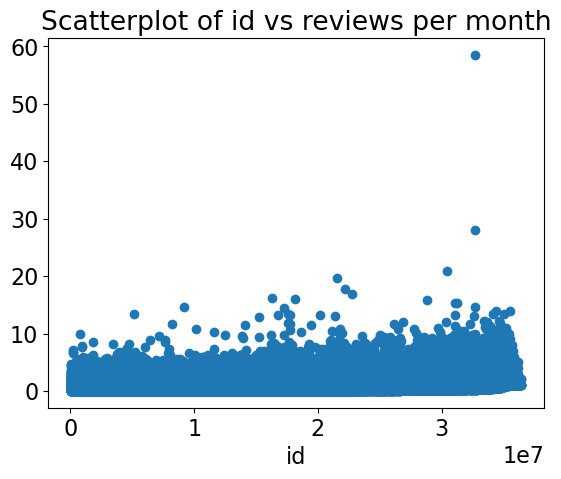

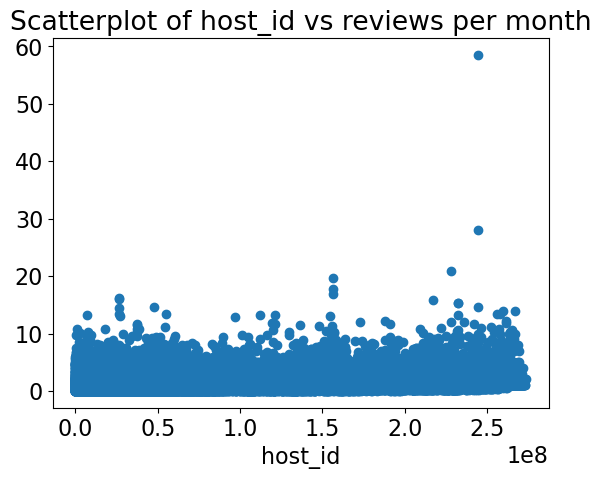

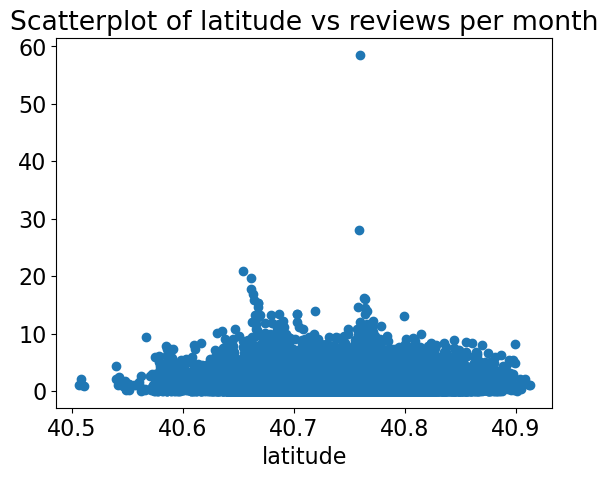

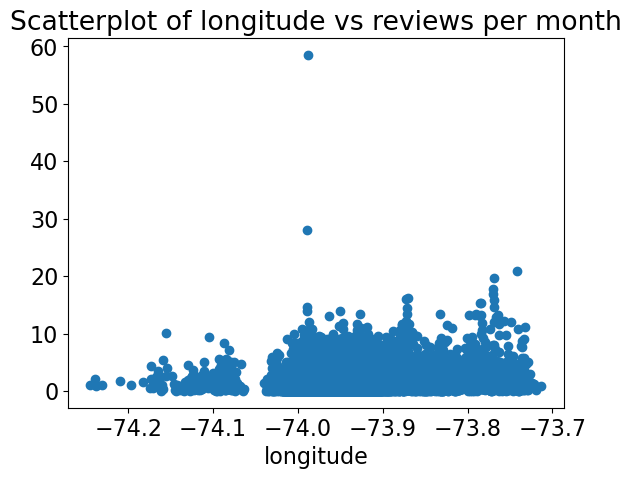

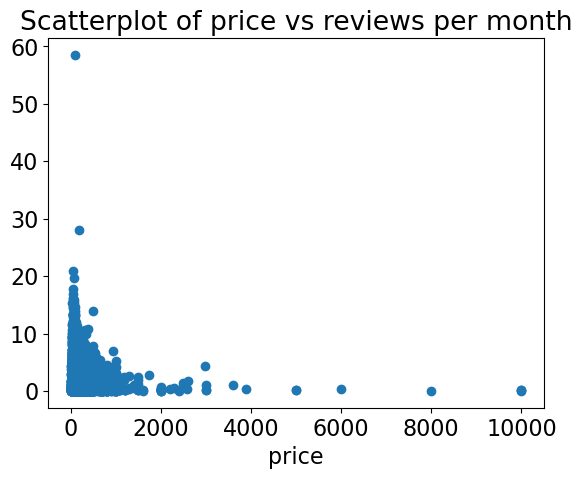

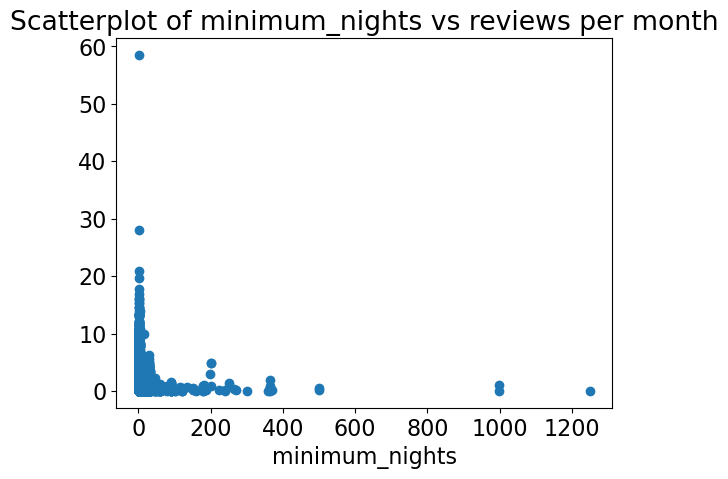

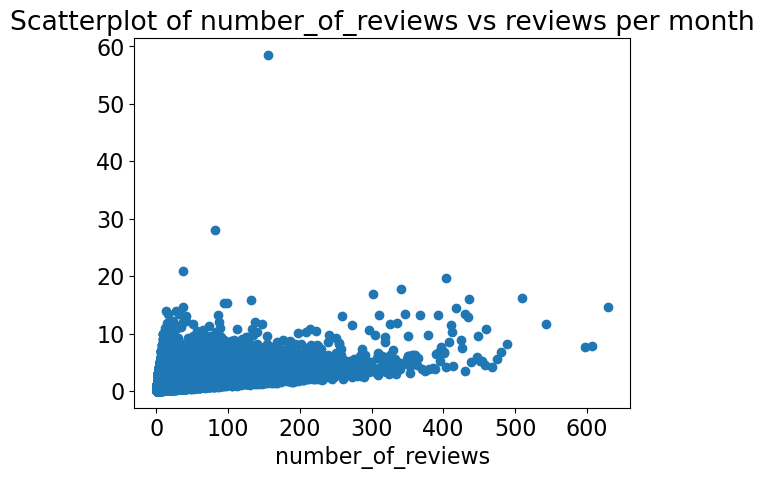

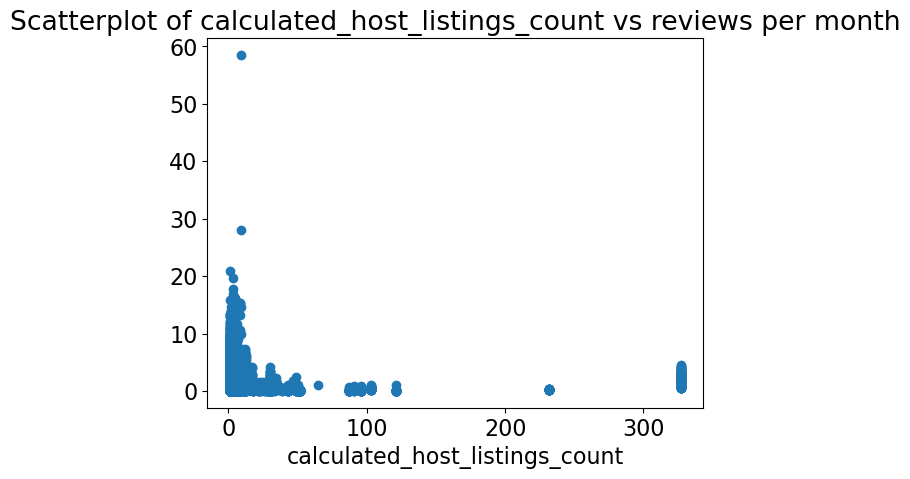

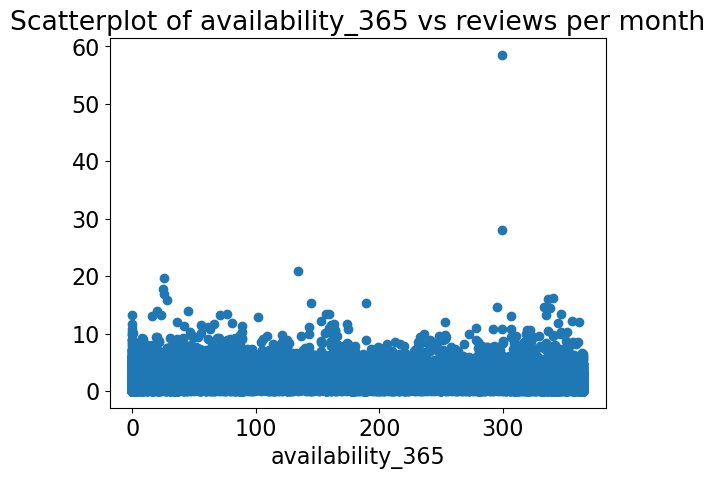

In [14]:
numeric_col = ['id', 'host_id', 'latitude', 'longitude', 'price', 'minimum_nights', 'number_of_reviews', 'calculated_host_listings_count', 'availability_365']
for col in numeric_col:
    vis = plt.scatter(train_df[col], train_df["reviews_per_month"])
    plt.xlabel(col)
    plt.title("Scatterplot of " + col + " vs reviews per month")
    plt.show()

<h3>📊 Histogram for Neighbourhood Group and Room Type</h3>

- In both `neighbourhood_group` and `room type` , we can see that  some categories have more `reviews_per_month` than others such as Manhattan is the most prominent `neighbourhood_group` as well as Private room has the most number of `reviews_per_month`.

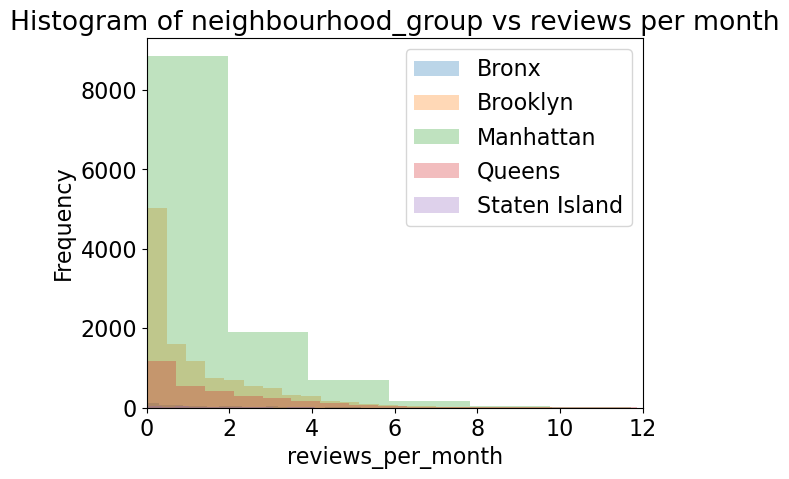

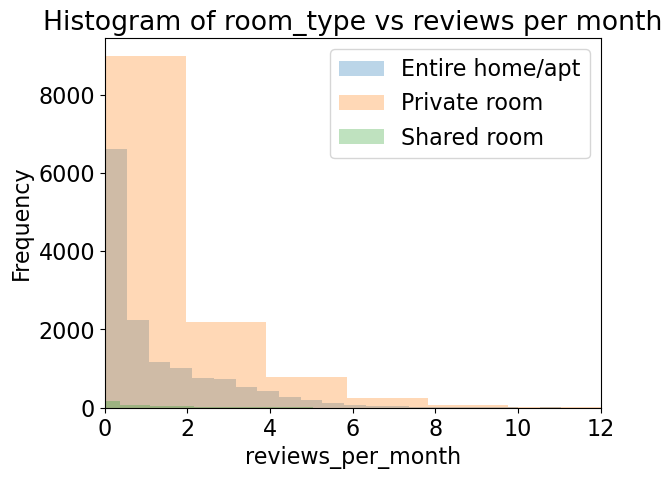

In [15]:
categorical_cols = ["neighbourhood_group", "room_type"]
for col in categorical_cols:
    ax = train_df.groupby(col)["reviews_per_month"].plot.hist(bins = 30,alpha=0.3, legend=True)
    plt.xlim([0, 12]) 
    plt.xlabel("reviews_per_month")
    plt.title("Histogram of " + col + " vs reviews per month")
    plt.show()

<h3>Summarizing Intial Observations</h3>

Based on this EDA, we can have an understanding of useful features and can further perform feature engineering and feature selection on them. As well as, we've dealt with the missing value of target in our dataset and verfied the changes through various summary statistics in our training dataframe.

<h3>🧮 Appropriate metrics for assessment</h3>


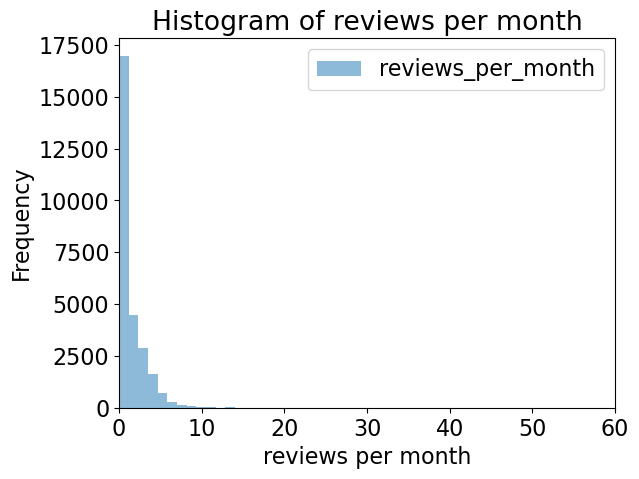

In [16]:
vis = train_df["reviews_per_month"].plot.hist(bins=50, alpha=0.5, legend=True)
plt.xlabel("reviews per month")
plt.xlim(0,60)
plt.title("Histogram of reviews per month")
plt.show()

Since this is a regression problem, we have decided to go with <b>MAPE (Mean Absolute Percentage Error)</b> because we have a right skewed distribution (with the max value for reviews being 58.5). This way we will have a correct measure to evaluate the error in reviews per month (we will be looking at % error).

<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## (Challenging) 4. Feature engineering <a name="4"></a>
<hr>
rubric={points:1}

**Your tasks:**

1. Carry out feature engineering. In other words, extract new features relevant for the problem and work with your new feature set in the following exercises. You may have to go back and forth between feature engineering and preprocessing. 

<div class="alert alert-warning">
    
Solution_4
    
</div>

_Points:_ 1

<!-- END QUESTION -->
Looking at the ```Latitude``` and ```Longitude``` columns, it is safe to say that they are continuous variables. Sometimes numerical or continuous features do not work well with non-linear models as well as linear models. To ensure improved accuracy of our model, it is better to for us to bin both of these columns using ```KBinsDiscretizer```.
<br><br>

Now, looking at the two columns ```minimum_nights``` and ```price```. We see that alone, ```minimum_nights``` is provides little value to predicting our target variable. But, if were to combine the two columns to get ```minimum_price```, it would serve us better to have the minimum money spent by a person whenever they book the given listing.

In [17]:
X_train = X_train.assign(
    minimum_price = X_train["minimum_nights"] * X_train["price"]
)
X_test = X_test.assign(minimum_price = X_test["minimum_nights"] * X_test["price"])

<!-- BEGIN QUESTION -->

## 5. Preprocessing and transformations <a name="5"></a>
<hr>
rubric={points:10}

**Your tasks:**

1. Identify any data cleaning that needs to be done and perform it.
2. Identify different feature types and the transformations you would apply on each feature type. 
3. Define a column transformer, if necessary.
4. You have likely noticed the `number_of_reviews` feature will be higly informative for the target `reviews_per_month`. To make this assignment more interesting **drop** the `number_of_reviews` feature.

<div class="alert alert-warning">
    
Solution_5
    
</div>

_Points:_ 10

We've handled the `np.nan` values in target during our EDA. Looking at all the features in X_train we don't have much data cleaning left to do i.e., can move forward with transformations.

In [18]:
print(X_train.shape)
display(X_train.head())
display(X_train.info())

(27236, 16)


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,calculated_host_listings_count,availability_365,minimum_price
4,16162621,NEW! Exceptional 2BR/1BA Williamsburg Oasis,104781467,Russell,Brooklyn,Williamsburg,40.71306,-73.94856,Entire home/apt,199,3,1,2016-12-11,1,0,597
6,14807279,Renovated brownstone apt w/ private outdoor patio,43853650,Eric,Brooklyn,Bedford-Stuyvesant,40.68612,-73.95927,Entire home/apt,225,4,112,2019-06-30,1,136,900
8,27573483,"Fort Greene two bedroom, quiet and peaceful",1180925,Mark,Brooklyn,Fort Greene,40.69488,-73.97222,Entire home/apt,200,7,1,2018-09-21,3,163,1400
10,19154733,2 bedrooms Williamsburg loft - huge and sunny,42405567,Chris,Brooklyn,Williamsburg,40.71356,-73.94372,Entire home/apt,225,4,7,2018-09-02,2,8,900
11,28736839,"Gorgeous Harlem loft w/15 ft ceilings, sleeps 10",3251620,S,Manhattan,Harlem,40.81148,-73.95140,Entire home/apt,300,1,1,2018-10-10,1,0,300


<class 'pandas.core.frame.DataFrame'>
Index: 27236 entries, 4 to 34225
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              27236 non-null  int64  
 1   name                            27231 non-null  object 
 2   host_id                         27236 non-null  int64  
 3   host_name                       27223 non-null  object 
 4   neighbourhood_group             27236 non-null  object 
 5   neighbourhood                   27236 non-null  object 
 6   latitude                        27236 non-null  float64
 7   longitude                       27236 non-null  float64
 8   room_type                       27236 non-null  object 
 9   price                           27236 non-null  int64  
 10  minimum_nights                  27236 non-null  int64  
 11  number_of_reviews               27236 non-null  int64  
 12  last_review                     27236

None

| Feature | Transformation | Explanation
| --- | ----------- | ----- |
| id | drop |  Since this is a unique identifier, this doesn't provide any input to the training data, hence, it is safe to drop this feature.|
| name | drop | The name is a text featuer which could have provided some value as a feature, but the names are ussualy a combination of room_type and the address , both of which we have as different features. So, even if we try to use a CountVectorizer, it won't provide us any additional value, rather confuse our model. Hence, it is better to drop this feature.|
| host_id | drop | Since this is a unique identifier, this doesn't provide any input to the training data, hence, it is safe to drop this feature. |
| host_name | drop| This is a feature that might have some correlation with the target since the host might have a reputation based on which the reviews are influenced. But since we have a few Null values in this feature, we will drop this feature because the NULL values might be in the test_df as well and we cannot impute these values since they are string type. So, it is better to drop this feature for now. |
| last_review | drop | Since this feature doesn't provide any input to the training data, hence, it is safe to drop this feature.|
| number_of_reviews | drop | *Guidelines for the Assignment* |
| neighbourhood_group| One-Hot Encoding | This is a categorical feature and so we need to perform one-hot encoding in oredr for sklearn libraries to work in model training.|
| neighbourhood	| One-Hot Encoding | This is a categorical feature and so we need to perform one-hot encoding in oredr for sklearn libraries to work in model training.|
| room_type | One-Hot Encoding  | This is a categorical feature with three types and we could have performed ordinal encoding for this feature instead. But, because the type of room is a personal preference, we decided to go with one-hot encoding for this categorical feature instead. |
| latitude | Scaling | We have all the values no NaN values in this feature so we will only scale this numeric feature.|
| longitude | Scaling | We have all the values no NaN values in this feature so we will only scale this numeric feature. |
| minimum_price | Scaling  | We have all the values no NaN values in this feature so we will only scale this numeric feature. | 
| calculated_host_listings_count | Scaling | We have all the values no NaN values in this feature so we will only scale this numeric feature.| 
| availability_365 | Scaling | We have all the values no NaN values in this feature so we will only scale this numeric feature.|



<h3> Column Transformer</h3>

In [19]:
categorical_feats = ["neighbourhood_group", "neighbourhood", "room_type"]
numerical_feats = ["minimum_price", "calculated_host_listings_count", "availability_365"]
discretization_feats = ["latitude", "longitude"]
drop_feats = ["id", "name", "host_id", "host_name", "last_review", "number_of_reviews"]

In [20]:
preprocessor = make_column_transformer(
    (OneHotEncoder(sparse_output = False, handle_unknown="ignore"), categorical_feats),
    (StandardScaler(), numerical_feats),
    (KBinsDiscretizer(n_bins=20, encode="onehot"), discretization_feats),
    ("drop", drop_feats)
)

<h3>Function 𝑓  for calculating mean and standard deviation of Cross Validation Score</h3>

In [21]:
def mean_std_cross_val_scores(model, X_train, y_train, **kwargs):
    """
    Returns mean and std of cross validation

    Parameters
    ----------
    model :
        scikit-learn model
    X_train : numpy array or pandas DataFrame
        X in the training data
    y_train :
        y in the training data

    Returns
    ----------
        pandas Series with mean scores from cross_validation
    """

    scores = cross_validate(model, X_train, y_train, **kwargs)

    mean_scores = pd.DataFrame(scores).mean()
    std_scores = pd.DataFrame(scores).std()
    out_col = []

    for i in range(len(mean_scores)):
        out_col.append((f"%0.3f (+/- %0.3f)" % (mean_scores[i], std_scores[i])))

    return pd.Series(data=out_col, index=mean_scores.index)

<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 6. Baseline model <a name="6"></a>
<hr>
rubric={points:2}

**Your tasks:**
1. Try `scikit-learn`'s baseline model and report results.

<div class="alert alert-warning">
    
Solution_6
    
</div>

_Points:_ 2

In [22]:
results = {}
base_pipe = make_pipeline(preprocessor, DummyRegressor(strategy = "mean"))

<h3>Scorer as per chose appropriate metric</h3>

In [23]:
mape_scorer = make_scorer(mean_absolute_percentage_error, greater_is_better=False) # since we are scoring using MAPE.

In [24]:
score_dummy = cross_validate(base_pipe, X_train, y_train, cv = 5,return_train_score=True,scoring=mape_scorer)
results["Dummy"] = mean_std_cross_val_scores( base_pipe, X_train, y_train, return_train_score=True, scoring=mape_scorer)
display(pd.DataFrame(score_dummy))
pd. DataFrame(results).T


Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`


,fit_time,score_time,test_score,train_score
0,0.167709,0.051878,-6.825138,-6.749370
1,0.163547,0.057529,-6.673986,-6.787467
2,0.159655,0.069928,-6.715014,-6.814900
3,0.158056,0.056536,-6.747300,-6.776844
4,0.147091,0.051414,-6.949103,-6.781087


,fit_time,score_time,test_score,train_score
Dummy,0.187 (+/- 0.076),0.048 (+/- 0.008),-6.782 (+/- 0.109),-6.782 (+/- 0.023)


<h3>Report of Results:</h3>

We see that the scores predicted by `DummyRegressor` with strategy = "mean" gives constant values regardeless of what test features are. That is why we see the mean `test_score` and `train_score` are same with a slight difference in standard deviation due to cross-validation.


<!-- END QUESTION -->



<!-- BEGIN QUESTION -->

## 7. Linear models  <a name="7"></a>
<hr>
rubric={points:10}

**Your tasks:**

1. Try a linear model as a first real attempt. 
2. Carry out hyperparameter tuning to explore different values for the complexity hyperparameter. 
3. Report cross-validation scores along with standard deviation. 
4. Summarize your results.

<div class="alert alert-warning">
    
Solution_7
    
</div>

_Points:_ 10

We will be using Ridge as our first attempt. 

Further, We can also transform our target using the ```TransformedTargetRegressor``` method as our target was highly right skewed evident from EDA. We will do this for all the models we test from this point on.

Alongside, we'll carry out hyperparameter tuning to explore different values for the complexity hyperparameter $\alpha$ in Ridge.

In [25]:
param_grid = {'transformedtargetregressor__regressor__alpha': 10.0 ** np.arange(-5, 5, 1)}
ttr_R = TransformedTargetRegressor(
    Ridge(random_state=123), func=np.log1p, inverse_func=np.expm1
    )
pipe_linear = make_pipeline(preprocessor, ttr_R)
search = RandomizedSearchCV(pipe_linear, param_grid,n_iter=10, n_jobs=-1,return_train_score=True, scoring = mape_scorer)
search.fit(X_train, y_train)
train_scores = search.cv_results_["mean_train_score"]
cv_scores = search.cv_results_["mean_test_score"]
print("Train scores are:", train_scores)
print("Cross Validation scores are:", cv_scores)


Train scores are: [-3.94812177 -3.94812214 -3.94812585 -3.94816287 -3.94852298 -3.95164937
 -3.96634838 -4.00310958 -4.0917814  -4.31454108]
Cross Validation scores are: [-4.00335181 -4.00335156 -4.00334905 -4.00332422 -4.00310339 -4.00236209
 -4.0056308  -4.02686165 -4.10202045 -4.31616212]


Text(0, 0.5, 'score')

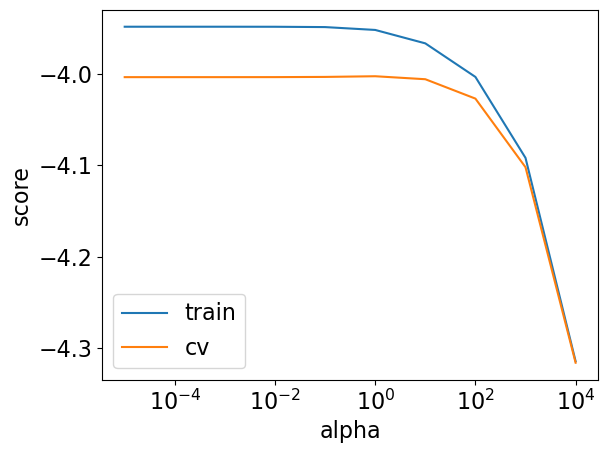

In [26]:
plt.semilogx(param_grid["transformedtargetregressor__regressor__alpha"], train_scores.tolist(), label="train")
plt.semilogx(param_grid["transformedtargetregressor__regressor__alpha"], cv_scores.tolist(), label="cv")
plt.legend()
plt.xlabel("alpha")
plt.ylabel("score")

In [27]:
best_alpha = search.best_params_
print(best_alpha)
print("the best score in the linear model for that alpha is : ", search.best_score_)

{'transformedtargetregressor__regressor__alpha': 1.0}
the best score in the linear model for that alpha is :  -4.002362090213934


- It seems `alpha=1` is the best choice here. Which is also the default value that Ridge takes.
- General intuition: larger `alpha` leads to smaller coefficients.
- Smaller coefficients mean the predictions are less sensitive to changes in the data. Hence less chance of overfitting.  

In [28]:
ttr_R = TransformedTargetRegressor(
    Ridge(alpha = 1 , random_state=123), func=np.log1p, inverse_func=np.expm1
    )
pipe_linear = make_pipeline(preprocessor, ttr_R)
scores = cross_validate(pipe_linear, X_train, y_train, return_train_score=True, scoring=mape_scorer)
results["LinearModel"] = mean_std_cross_val_scores( pipe_linear, X_train, y_train, return_train_score=True, scoring=mape_scorer)
display(pd.DataFrame(scores))
pd.DataFrame(results).T

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`


,fit_time,score_time,test_score,train_score
0,0.296014,0.067721,-4.071049,-3.934563
1,0.370479,0.050933,-3.919886,-3.945248
2,0.230155,0.040830,-3.934030,-3.967455
3,0.245344,0.042653,-4.030312,-3.961551
4,0.459669,0.042385,-4.056534,-3.949429


,fit_time,score_time,test_score,train_score
Dummy,0.187 (+/- 0.076),0.048 (+/- 0.008),-6.782 (+/- 0.109),-6.782 (+/- 0.023)
LinearModel,0.238 (+/- 0.012),0.049 (+/- 0.002),-4.002 (+/- 0.071),-3.952 (+/- 0.013)


<h3>📝 Summarizing Results</h3>

After finishing our first linear model we can see that the test scores are better than the baseline model. 

Despite the fit time being slightly more than baseline model we would still prefer this over that as the test_score has significantly high MAPE of <b>-4.002($\pm 0.071$)</b> 

As well as after doing some hyperparameter optimization for $\alpha$ we get it equal to the default value i.e., 1. There's no overestimation here as the gap between `train_score` and `test_score` isn't significant.

<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 8. Different models <a name="8"></a>
<hr>
rubric={points:12}

**Your tasks:**
1. Try at least 3 other models aside from a linear model. One of these models should be a tree-based ensemble model. 
2. Summarize your results in terms of overfitting/underfitting and fit and score times. Can you beat a linear model? 

<div class="alert alert-warning">
    
Solution_8
    
</div>

_Points:_ 12

We will be trying the following three models aside from a linear model above : 

- DecisionTreeRegressor

- RandomForestRegressor

- LightGBM 

Note :  Currently, we're trying all models without any hyperparameter optimization i.e., taking default values. We're just using TransformedTargetRegressor as done before in the LinearModel

<h3>1. DecisionTreeRegressor 🌳 </h3>

In [29]:
ttr_DTR = TransformedTargetRegressor(
    DecisionTreeRegressor(random_state=123), func=np.log1p, inverse_func=np.expm1
)
pipe2 = make_pipeline(preprocessor, ttr_DTR)
scores = cross_validate(pipe2, X_train, y_train, return_train_score=True, scoring=mape_scorer)
results["DecisionTreeRegressor"] = mean_std_cross_val_scores( pipe2, X_train, y_train, return_train_score=True, scoring=mape_scorer)
display(pd.DataFrame(scores))


Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`


,fit_time,score_time,test_score,train_score
0,1.173400,0.042235,-3.036673,-0.086258
1,0.986495,0.040193,-3.009260,-0.080895
2,1.073925,0.039691,-3.161984,-0.088720
3,1.096277,0.040324,-2.992691,-0.085759
4,0.988027,0.044610,-3.327454,-0.087387


<b>📝 SUMMARISING RESULTS</b>

After finishing our DecisionTreeRegressor we can see that the test scores are better than both the baseline model and LinearModel i.e., it <b>beats LinearModel</b> in case of test_scores. 

The `fit_time` for DecisionTreeRegressor is significantly higher than LinearModel as using default values lead to a fully grown and unpruned trees which can lead to very large trees. 

The `score_time` is approximately same (it's slightly higher than LinearModel) as it just traverses through the tree based on the feature chosen during fit.

As our tree is fully grown and unpruned it's definitely overfitting on the training set which is evident from the significant gap between `test_score` and `train_score`. To handle this we should later perform some hyperparameter optimization to choose an appropriate `max_depth`


In [30]:
pd.DataFrame(results).T

,fit_time,score_time,test_score,train_score
Dummy,0.187 (+/- 0.076),0.048 (+/- 0.008),-6.782 (+/- 0.109),-6.782 (+/- 0.023)
LinearModel,0.238 (+/- 0.012),0.049 (+/- 0.002),-4.002 (+/- 0.071),-3.952 (+/- 0.013)
DecisionTreeRegressor,1.055 (+/- 0.039),0.041 (+/- 0.003),-3.106 (+/- 0.141),-0.086 (+/- 0.003)


<h3>2. RandomForestRegressor 🌳🌳🌳</h3>

In [31]:
ttr_RFR = TransformedTargetRegressor(
    RandomForestRegressor(n_jobs=-1,random_state=123), func=np.log1p, inverse_func=np.expm1
)
pipe_rf = make_pipeline(
    preprocessor,ttr_RFR
)

results["Random forests"] = mean_std_cross_val_scores(
    pipe_rf, X_train, y_train, return_train_score=True, scoring=mape_scorer
)

pd.DataFrame(results).T


Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`


,fit_time,score_time,test_score,train_score
Dummy,0.187 (+/- 0.076),0.048 (+/- 0.008),-6.782 (+/- 0.109),-6.782 (+/- 0.023)
LinearModel,0.238 (+/- 0.012),0.049 (+/- 0.002),-4.002 (+/- 0.071),-3.952 (+/- 0.013)
DecisionTreeRegressor,1.055 (+/- 0.039),0.041 (+/- 0.003),-3.106 (+/- 0.141),-0.086 (+/- 0.003)
Random forests,37.391 (+/- 8.896),0.213 (+/- 0.031),-2.310 (+/- 0.073),-0.770 (+/- 0.005)


<b> 📝 SUMMARISING RESULTS</b>

After finishing our RandomForestRegressor we can see that the test scores are better than both the baseline model,  LinearModel and DecisionTreeRegressor i.e., it <b>beats LinearModel</b> in case of test_scores. 

The `fit_time` for RandomForestRegressor is significantly higher than any of the models we used earlier as using default values lead `n_estimators` = 100 i.e., it uses 100 random fully grown and unpruned trees using bootstrapping which can lead to very high fit_time.

The `score_time` is approximately slightly higher than other models as it the time taken to traverse through `n_estimators` = 100 and then taken an average of predictions from all tree takes more time than using just one DecisionTreeRegressor.

As all our trees are fully grown and unpruned it's definitely overfitting on the training set which is evident from the significant gap between `test_score` and `train_score`. But it is still not as bad as in DecisionTreeRegressor as we're averaging out the predictions. 

<h3>3. LightGBM 🎆 </h3>

In [32]:
ttr_LGBM = TransformedTargetRegressor(
    LGBMRegressor(random_state=123, verbose=-1), func=np.log1p, inverse_func=np.expm1
)
pipe_lgbm = make_pipeline(
    preprocessor, ttr_LGBM
)


results["LGBM Regressor"] = mean_std_cross_val_scores(
    pipe_lgbm, X_train, y_train, return_train_score=True, scoring=mape_scorer
)

pd.DataFrame(results).T

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`


,fit_time,score_time,test_score,train_score
Dummy,0.187 (+/- 0.076),0.048 (+/- 0.008),-6.782 (+/- 0.109),-6.782 (+/- 0.023)
LinearModel,0.238 (+/- 0.012),0.049 (+/- 0.002),-4.002 (+/- 0.071),-3.952 (+/- 0.013)
DecisionTreeRegressor,1.055 (+/- 0.039),0.041 (+/- 0.003),-3.106 (+/- 0.141),-0.086 (+/- 0.003)
Random forests,37.391 (+/- 8.896),0.213 (+/- 0.031),-2.310 (+/- 0.073),-0.770 (+/- 0.005)
LGBM Regressor,0.490 (+/- 0.248),0.080 (+/- 0.012),-2.274 (+/- 0.073),-2.133 (+/- 0.005)


<b>📝 SUMMARISING RESULTS</b>

After finishing LightGBM we can see that the test scores are better than both the baseline model, LinearModel, DecisionTreeRegressor and RandomForestRegressor i.e., it <b>beats LinearModel</b> and is the best among all the previous models. 

The `fit_time` for LightGBM is significantly less than any of the non-linear models we used earlier as it uses default data binning to speed up training process as well as adds one decision tree at a time to correct the prediction errors made by prior models i.e., focusing on boosting examples with larger gradient. This results in dramatic speedup of training than normal tree based models. 

The `score_time` for LightGBM is similar to Linear and DecisionTreeRegressor but is significantly less than RandomForestRegressor because it traverses all the tree in ensemble. The final prediction is a combination of the predictions from all the trees.

As for our default value of `n_estimators` in LightGBM we've don't have a huge number of boosted trees to fit i.e., we've less chance of overfitting. Which can also be seen from the small gap between `train_score` and `test_score`.

<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## (Challenging) 9. Feature selection <a name="9"></a>
<hr>
rubric={points:2}

**Your tasks:**

Make some attempts to select relevant features. You may try `RFECV` or forward selection for this. Do the results improve with feature selection? Summarize your results. If you see improvements in the results, keep feature selection in your pipeline. If not, you may abandon it in the next exercises. 

<div class="alert alert-warning">
    
Solution_9
    
</div>

_Points:_ 2

We will be using ```RFECV``` for feature selection. The model we will be using will be LightGBM Regressor as it has the best test score so far.

One thing to note is that ```TransformedTargetRegressor``` cannot be used here as ```RFECV``` calls ```coef_``` and ```feature_importances_``` which are not callable properties of TTR. Therefore, we are implementing the solution proposed on [StackOverflow](https://stackoverflow.com/questions/58155778/target-transformation-and-feature-selection-in-scikit-learn) by user ```Computer_guy```. 

In [33]:
class MyTransformedTargetRegressor(TransformedTargetRegressor):
    @property
    def feature_importances_(self):
        return self.regressor_.feature_importances_

    @property
    def coef_(self):
        return self.regressor_.coef_

In [34]:
Myttr_R = MyTransformedTargetRegressor(
    Ridge(random_state=123), func=np.log1p, inverse_func=np.expm1
)

rfe_cv = RFECV(Myttr_R, cv=10)

pipe_rfecv = make_pipeline(
    preprocessor,rfe_cv,LGBMRegressor(random_state=123, verbose=-1)
)

results["LGBM with RFECV"] = mean_std_cross_val_scores(
    pipe_rfecv, X_train, y_train, return_train_score=True, scoring=mape_scorer
)

pd.DataFrame(results).T

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`


,fit_time,score_time,test_score,train_score
Dummy,0.187 (+/- 0.076),0.048 (+/- 0.008),-6.782 (+/- 0.109),-6.782 (+/- 0.023)
LinearModel,0.238 (+/- 0.012),0.049 (+/- 0.002),-4.002 (+/- 0.071),-3.952 (+/- 0.013)
DecisionTreeRegressor,1.055 (+/- 0.039),0.041 (+/- 0.003),-3.106 (+/- 0.141),-0.086 (+/- 0.003)
Random forests,37.391 (+/- 8.896),0.213 (+/- 0.031),-2.310 (+/- 0.073),-0.770 (+/- 0.005)
LGBM Regressor,0.490 (+/- 0.248),0.080 (+/- 0.012),-2.274 (+/- 0.073),-2.133 (+/- 0.005)
LGBM with RFECV,200.482 (+/- 25.716),0.100 (+/- 0.014),-2.973 (+/- 0.115),-2.830 (+/- 0.028)


We see that the LGBM model with RFECV performs worse than the normal model. Now we will use the ```SelectFromModel``` to see if that fares better.

In [35]:
select_CV = SelectFromModel(
    Myttr_R, threshold="median"
)

pipe_select_CV = make_pipeline(
    preprocessor,select_CV,LGBMRegressor(random_state=123, verbose=-1)
)

results["LGBM with SelectFromModel"] = mean_std_cross_val_scores(
    pipe_select_CV, X_train, y_train, return_train_score=True, scoring=mape_scorer
)

pd.DataFrame(results).T

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`


,fit_time,score_time,test_score,train_score
Dummy,0.187 (+/- 0.076),0.048 (+/- 0.008),-6.782 (+/- 0.109),-6.782 (+/- 0.023)
LinearModel,0.238 (+/- 0.012),0.049 (+/- 0.002),-4.002 (+/- 0.071),-3.952 (+/- 0.013)
DecisionTreeRegressor,1.055 (+/- 0.039),0.041 (+/- 0.003),-3.106 (+/- 0.141),-0.086 (+/- 0.003)
Random forests,37.391 (+/- 8.896),0.213 (+/- 0.031),-2.310 (+/- 0.073),-0.770 (+/- 0.005)
LGBM Regressor,0.490 (+/- 0.248),0.080 (+/- 0.012),-2.274 (+/- 0.073),-2.133 (+/- 0.005)
LGBM with RFECV,200.482 (+/- 25.716),0.100 (+/- 0.014),-2.973 (+/- 0.115),-2.830 (+/- 0.028)
LGBM with SelectFromModel,1.630 (+/- 1.568),0.173 (+/- 0.102),-3.679 (+/- 0.112),-3.597 (+/- 0.024)


It can be seen that the LGBM model with either feature selection method is performing worse than base LGBM model. Therefore, we will not be using the model with feature selection. The bad results of the feature selection model can be attributed to data complexity or feature relevance.

<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 10. Hyperparameter optimization <a name="10"></a>
<hr>
rubric={points:10}

**Your tasks:**

Make some attempts to optimize hyperparameters for the models you've tried and summarize your results. In at least one case you should be optimizing multiple hyperparameters for a single model. You may use `sklearn`'s methods for hyperparameter optimization or fancier Bayesian optimization methods. 
  - [GridSearchCV](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html)   
  - [RandomizedSearchCV](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RandomizedSearchCV.html)
  - [scikit-optimize](https://github.com/scikit-optimize/scikit-optimize) 

<div class="alert alert-warning">
    
Solution_10
    
</div>

_Points:_ 10

_Type your answer here, replacing this text._

For Hyperparameter optimization, we will be using our two best performing models.

In [36]:
pd.DataFrame(results).T

,fit_time,score_time,test_score,train_score
Dummy,0.187 (+/- 0.076),0.048 (+/- 0.008),-6.782 (+/- 0.109),-6.782 (+/- 0.023)
LinearModel,0.238 (+/- 0.012),0.049 (+/- 0.002),-4.002 (+/- 0.071),-3.952 (+/- 0.013)
DecisionTreeRegressor,1.055 (+/- 0.039),0.041 (+/- 0.003),-3.106 (+/- 0.141),-0.086 (+/- 0.003)
Random forests,37.391 (+/- 8.896),0.213 (+/- 0.031),-2.310 (+/- 0.073),-0.770 (+/- 0.005)
LGBM Regressor,0.490 (+/- 0.248),0.080 (+/- 0.012),-2.274 (+/- 0.073),-2.133 (+/- 0.005)
LGBM with RFECV,200.482 (+/- 25.716),0.100 (+/- 0.014),-2.973 (+/- 0.115),-2.830 (+/- 0.028)
LGBM with SelectFromModel,1.630 (+/- 1.568),0.173 (+/- 0.102),-3.679 (+/- 0.112),-3.597 (+/- 0.024)


As we can see that Random Forest and LGBM Regressor are the best performing models.

In [37]:
#Making the model
ttr_lgbm = TransformedTargetRegressor(
    LGBMRegressor(random_state=123, verbose=-1), func=np.log1p, inverse_func=np.expm1
)
#making the pipeline
pipe_lgbm = make_pipeline(
    preprocessor, ttr_LGBM
)
print(ttr_lgbm)

TransformedTargetRegressor(func=<ufunc 'log1p'>, inverse_func=<ufunc 'expm1'>,
                           regressor=LGBMRegressor(random_state=123,
                                                   verbose=-1))


In [38]:
trees = [10, 50, 100, 250, 500, 750, 1000, 1250, 1750, 2000]
max_depth = [x for x in range(1,11)]

param_grid_lgbm = {'transformedtargetregressor__regressor__n_estimators': trees,
              'transformedtargetregressor__regressor__max_depth': max_depth,
              'transformedtargetregressor__regressor__num_leaves': [2**x for x in max_depth]}

search_lgbm = RandomizedSearchCV(pipe_lgbm, 
                                 param_grid_lgbm,
                                 n_iter=10, 
                                 n_jobs=-1,
                                 return_train_score=True, 
                                 scoring = mape_scorer)
search_lgbm.fit(X_train, y_train)
train_scores = search_lgbm.cv_results_["mean_train_score"]
cv_scores = search_lgbm.cv_results_["mean_test_score"]
print("Train scores are:", train_scores)
print("Cross Validation scores are:", cv_scores)

Train scores are: [-1.83073855 -2.48187986 -1.73084571 -1.57999545 -2.18021428 -3.02852016
 -2.56417948 -2.60205766 -2.93840046 -2.27048796]
Cross Validation scores are: [-2.22414481 -2.49831471 -2.22638855 -2.23519073 -2.28137068 -3.04981816
 -2.58698082 -2.62007804 -3.0027441  -2.32647151]


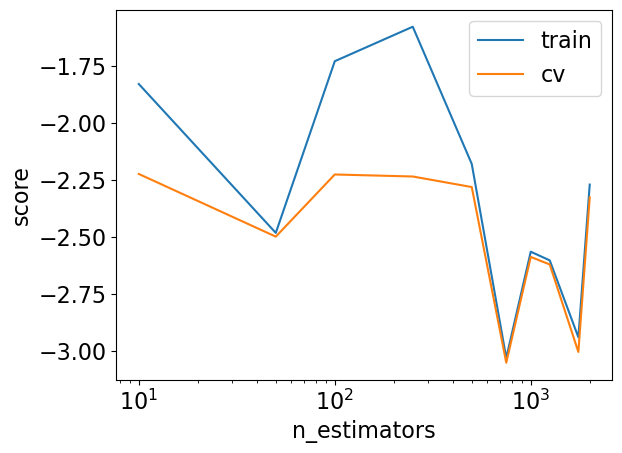

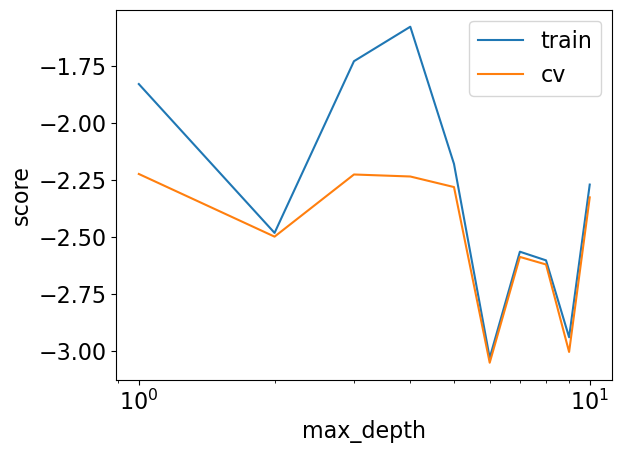

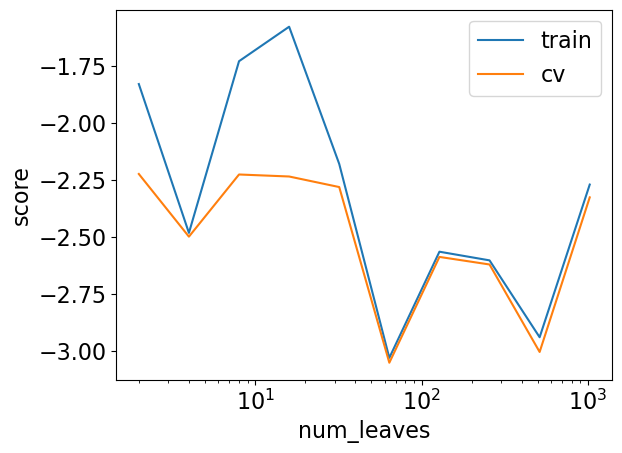

In [39]:
hyperparameters = ['n_estimators', 'max_depth', 'num_leaves']

# Create separate rows for each hyperparameter
for idx, x in enumerate(hyperparameters, start=1):
    hyp = "transformedtargetregressor__regressor__" + x
    
    plt.figure(idx)  # Create a new figure for each hyperparameter
    
    plt.semilogx(param_grid_lgbm[hyp], train_scores.tolist(), label="train")
    plt.semilogx(param_grid_lgbm[hyp], cv_scores.tolist(), label="cv")
    plt.legend()
    plt.xlabel(x)
    plt.ylabel("score")

# Show all the plots
plt.show()

In [40]:
best_vals_lgbm = search_lgbm.best_params_
best_num_leaves_lgbm = best_vals_lgbm['transformedtargetregressor__regressor__num_leaves']
best_n_estimators_lgbm = best_vals_lgbm['transformedtargetregressor__regressor__n_estimators']
best_max_depth_lgbm = best_vals_lgbm['transformedtargetregressor__regressor__max_depth']
print(best_vals_lgbm)

{'transformedtargetregressor__regressor__num_leaves': 64, 'transformedtargetregressor__regressor__n_estimators': 250, 'transformedtargetregressor__regressor__max_depth': 10}


In [41]:
results_hyperparams = {}
ttr_LGBM = TransformedTargetRegressor(
    LGBMRegressor(num_leaves = best_num_leaves_lgbm,
                  n_estimators = best_n_estimators_lgbm,
                  max_depth = best_max_depth_lgbm,
                  random_state=123, 
                  verbose=-1), 
    func=np.log1p, inverse_func=np.expm1
)
pipe_lgbm = make_pipeline(
    preprocessor, ttr_LGBM
)


results_hyperparams["LGBM Regressor"] = mean_std_cross_val_scores(
    pipe_lgbm, X_train, y_train, return_train_score=True, scoring=mape_scorer
)

pd.DataFrame(results_hyperparams).T

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`


,fit_time,score_time,test_score,train_score
LGBM Regressor,0.899 (+/- 0.493),0.155 (+/- 0.003),-2.224 (+/- 0.073),-1.831 (+/- 0.009)


In [42]:
#Making model
ttr_DTR = TransformedTargetRegressor(
    DecisionTreeRegressor(random_state=123), func=np.log1p, inverse_func=np.expm1
)
#making Pipeline
pipe_dtr = make_pipeline(
    preprocessor,ttr_DTR
)
#Hyperparameter values
param_grid_dtr = {
    'transformedtargetregressor__regressor__max_depth': [int(x) for x in np.linspace(1, 110, num=10)]  # Maximum depth of the tree
}

In [43]:
search_dtr = RandomizedSearchCV(pipe_dtr, 
                                 param_grid_dtr,
                                 n_iter=10, 
                                 n_jobs=-1,
                                 return_train_score=True, 
                                 scoring = mape_scorer)
search_dtr.fit(X_train, y_train)
train_scores = search_dtr.cv_results_["mean_train_score"]
cv_scores = search_dtr.cv_results_["mean_test_score"]
print("Train scores are:", train_scores)
print("Cross Validation scores are:", cv_scores)

Train scores are: [-3.03998978 -1.94042524 -0.89615259 -0.38491337 -0.19998502 -0.12091543
 -0.09120169 -0.08588828 -0.08580367 -0.08580367]
Cross Validation scores are: [-3.04012148 -2.41509417 -2.78962828 -2.9748324  -3.06659341 -3.10683772
 -3.11363556 -3.09881161 -3.10561234 -3.10561234]


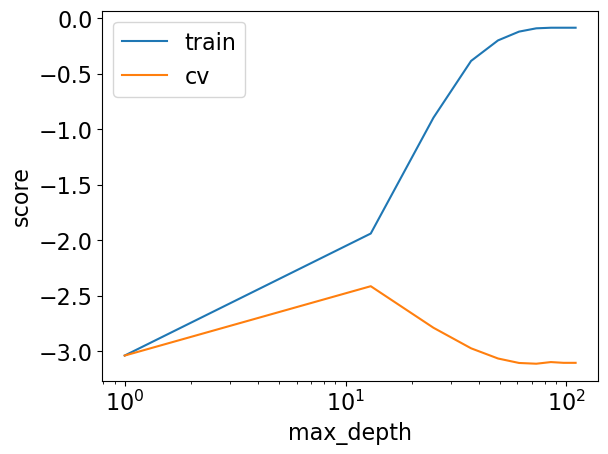

In [44]:
hyperparameters = ['max_depth']

# Create separate rows for each hyperparameter
for idx, x in enumerate(hyperparameters, start=1):
    hyp = "transformedtargetregressor__regressor__" + x
    
    plt.figure(idx)  # Create a new figure for each hyperparameter
    
    plt.semilogx(param_grid_dtr[hyp], train_scores.tolist(), label="train")
    plt.semilogx(param_grid_dtr[hyp], cv_scores.tolist(), label="cv")
    plt.legend()
    plt.xlabel(x)
    plt.ylabel("score")

# Show all the plots
plt.show()

In [45]:
best_vals_dtr = search_dtr.best_params_
best_max_depth_dtr = best_vals_dtr['transformedtargetregressor__regressor__max_depth']
print(best_vals_dtr)

{'transformedtargetregressor__regressor__max_depth': 13}


In [46]:
ttr_DTR = TransformedTargetRegressor(
    DecisionTreeRegressor(max_depth = best_max_depth_dtr,
                          random_state=123), 
    func=np.log1p, inverse_func=np.expm1
)
#making Pipeline
pipe_dtr = make_pipeline(
    preprocessor,ttr_DTR
)

results_hyperparams["Decision Tree Regressor"] = mean_std_cross_val_scores(
    pipe_dtr, X_train, y_train, return_train_score=True, scoring=mape_scorer
)

pd.DataFrame(results_hyperparams).T

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`


,fit_time,score_time,test_score,train_score
LGBM Regressor,0.899 (+/- 0.493),0.155 (+/- 0.003),-2.224 (+/- 0.073),-1.831 (+/- 0.009)
Decision Tree Regressor,0.726 (+/- 0.159),0.037 (+/- 0.002),-2.415 (+/- 0.077),-1.940 (+/- 0.007)


Till this point, our best model is ```LGBMRegressor```. Therefore, that is what we will be using from this point on.

<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 11. Interpretation and feature importances <a name="1"></a>
<hr>
rubric={points:10}

**Your tasks:**

1. Use the methods we saw in class (e.g., `eli5`, `shap`) (or any other methods of your choice) to examine the most important features of one of the non-linear models. 
2. Summarize your observations. 

<div class="alert alert-warning">
    
Solution_11
    
</div>

_Points:_ 10

<h3>📈 Examining Correlation each feature in X_train</h3>

In [47]:
preprocessor.fit(X_train)
ohe_feature_names = (
    pipe_lgbm.named_steps["columntransformer"]
    .named_transformers_["onehotencoder"]
    .get_feature_names_out(categorical_feats)
    .tolist()
)

discretization_feats_names = (
    preprocessor.named_transformers_["kbinsdiscretizer"]
    .get_feature_names_out(discretization_feats)
    .tolist()
)
feature_names = (
    numerical_feats + discretization_feats_names + ohe_feature_names
)
len(feature_names)

266

In [48]:
X_train_enc = preprocessor.fit_transform(X_train)
corr_df = pd.DataFrame(X_train_enc, columns=feature_names).corr().abs()

In [49]:
#Setting Diagonals to 0
corr_df[corr_df == 1] = 0

In [50]:
high_corr = [column for column in corr_df.columns if any(corr_df[column] > 0.80)]
print(high_corr)

['neighbourhood_Sheepshead Bay', 'neighbourhood_Shore Acres']


We can see that these two are highly correlated features : `neighbourhood_Sheepshead Bay` \& `neighbourhood_Shore Acres`.  They belong to the same `neighbourhood` before one-hot encoder. However, this is usually not a problem because these new features are statistically/informationally redundant as these both neighbourhood are close by and costal regions.

<h3>🤯 Interpretting SHAP values</h3>

In [51]:
pipe_lgbm.named_steps["transformedtargetregressor"].fit(X_train_enc, y_train)
lgbm_explainer = shap.TreeExplainer(pipe_lgbm.named_steps["transformedtargetregressor"].regressor_)
train_lgbm_shap_values = lgbm_explainer.shap_values(X_train_enc)

In [52]:
train_lgbm_shap_values

array([[-3.12836516e-04, -4.82216156e-03, -8.80026680e-03, ...,
        -8.40218344e-04, -8.74469640e-04, -1.57980560e-03],
       [-1.31446888e-04, -1.59510612e-02, -2.63027591e-02, ...,
        -3.90172513e-04, -1.12154400e-03, -2.26525415e-03],
       [-6.11146099e-05, -9.18322698e-03, -4.58016823e-02, ...,
        -9.70791276e-04, -3.04904045e-04, -8.76960660e-04],
       ...,
       [-2.23300301e-04,  3.38906316e-03,  9.74118598e-03, ...,
        -2.99832102e-04, -5.92255682e-04, -1.49432338e-03],
       [ 2.18738577e-03,  5.57322284e-03, -1.18069483e-02, ...,
        -4.60422245e-03,  9.34487429e-04,  3.49557560e-02],
       [ 6.52906007e-04,  3.15361374e-03, -3.94044982e-02, ...,
         2.22916273e-04, -4.38910991e-03,  9.21275248e-03]])

In [53]:
# train_lgbm_shap_values.shape
shap_values = pd.DataFrame(train_lgbm_shap_values, columns=feature_names)
shap_values

,minimum_price,calculated_host_listings_count,availability_365,latitude_0.0,latitude_1.0,latitude_2.0,latitude_3.0,latitude_4.0,latitude_5.0,latitude_6.0,...,neighbourhood_Whitestone,neighbourhood_Williamsbridge,neighbourhood_Williamsburg,neighbourhood_Windsor Terrace,neighbourhood_Woodhaven,neighbourhood_Woodlawn,neighbourhood_Woodside,room_type_Entire home/apt,room_type_Private room,room_type_Shared room
0,-0.000313,-0.004822,-0.008800,-0.000252,-0.000255,0.0,0.0,0.0,0.000034,0.000469,...,0.000170,0.001572,-0.000052,0.000013,-0.000063,-0.000952,0.000062,-0.000840,-0.000874,-0.001580
1,-0.000131,-0.015951,-0.026303,-0.000192,-0.000078,0.0,0.0,0.0,0.000037,0.000744,...,-0.000556,0.002547,-0.000417,0.000571,-0.000122,-0.003028,-0.000940,-0.000390,-0.001122,-0.002265
2,-0.000061,-0.009183,-0.045802,-0.000449,-0.000068,0.0,0.0,0.0,0.000060,0.001260,...,0.000248,-0.001755,-0.000466,0.000136,-0.001248,-0.001220,-0.000043,-0.000971,-0.000305,-0.000877
3,-0.000115,-0.009992,-0.016448,-0.001291,-0.000092,0.0,0.0,0.0,0.000034,0.000253,...,0.000178,-0.001423,-0.000381,-0.004512,0.000115,-0.000913,0.000131,-0.000058,-0.000730,-0.001304
4,-0.000487,0.003602,0.008649,-0.000293,-0.000239,0.0,0.0,0.0,0.000036,-0.000266,...,-0.000576,0.002393,0.000148,0.000027,-0.000515,-0.000937,-0.000045,-0.002847,-0.000163,-0.001732
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27231,0.000690,-0.003223,-0.014976,-0.002830,0.000015,0.0,0.0,0.0,0.000057,0.000399,...,0.000463,-0.002023,-0.000163,0.000593,-0.000129,-0.002338,0.000350,0.001942,-0.000989,-0.000464
27232,-0.000326,0.002421,0.021273,-0.000399,-0.000096,0.0,0.0,0.0,0.000032,-0.000170,...,0.000084,0.000205,-0.000007,0.000280,0.000501,-0.000446,-0.000150,-0.001770,-0.001746,-0.001269
27233,-0.000223,0.003389,0.009741,-0.000278,-0.000242,0.0,0.0,0.0,0.000036,0.000454,...,0.000047,-0.000250,0.000114,-0.000271,0.000224,-0.000894,0.000060,-0.000300,-0.000592,-0.001494
27234,0.002187,0.005573,-0.011807,-0.001705,-0.000569,0.0,0.0,0.0,0.000031,0.000069,...,0.000443,-0.002886,-0.000140,0.001063,0.000212,-0.000911,0.002222,-0.004604,0.000934,0.034956


In [54]:
shap_values_mean = shap_values.mean().sort_values()
shap_values_mean

neighbourhood_South Beach        -0.012981
neighbourhood_Shore Acres        -0.004714
availability_365                 -0.000627
neighbourhood_Belmont            -0.000481
calculated_host_listings_count   -0.000416
                                    ...   
neighbourhood_Silver Lake         0.000622
room_type_Shared room             0.000650
neighbourhood_SoHo                0.003071
neighbourhood_Soundview           0.006640
neighbourhood_Sheepshead Bay      0.006847
Length: 266, dtype: float64

- From this we can see that `neighbourhood_South Beach`, `neighbourhood_Shore Acres` and `availability_365` have the highest negative SHAP value i.e., on average these feature decreases the model output by maximum impact compared to other features.

- As well as `neighbourhood_Soundview `, `neighbourhood_SoHo ` , `neighbourhood_Sheepshead Bay` and `room_type_Shared room ` have maximum positive SHAP value i.e., on average these features increases the model output by maximum impact compared to other features.

- This could be due to the preference of some neighbourhood over others, room_type which determines their direction and impact on the `reviews_per_month`

In [55]:
shap.initjs() #before plotting initialisation


<h3>🤯 SHAP Summary Plot</h3>

This shows the global feature importances without the direction.

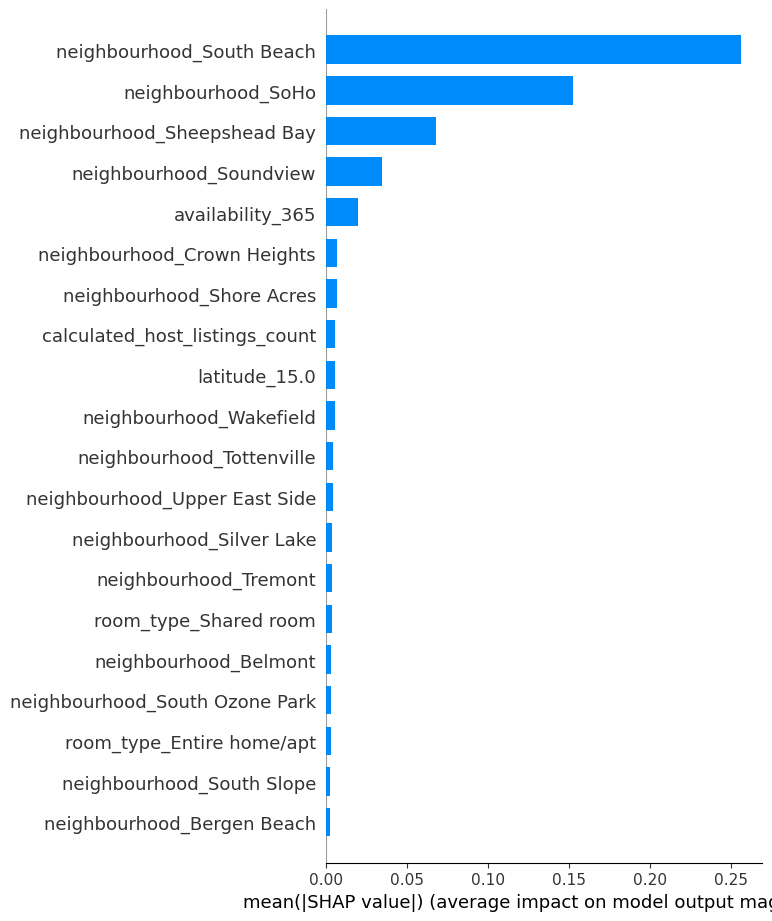

In [56]:
shap.summary_plot(
    train_lgbm_shap_values, X_train_enc, feature_names=feature_names, plot_type="bar"
)

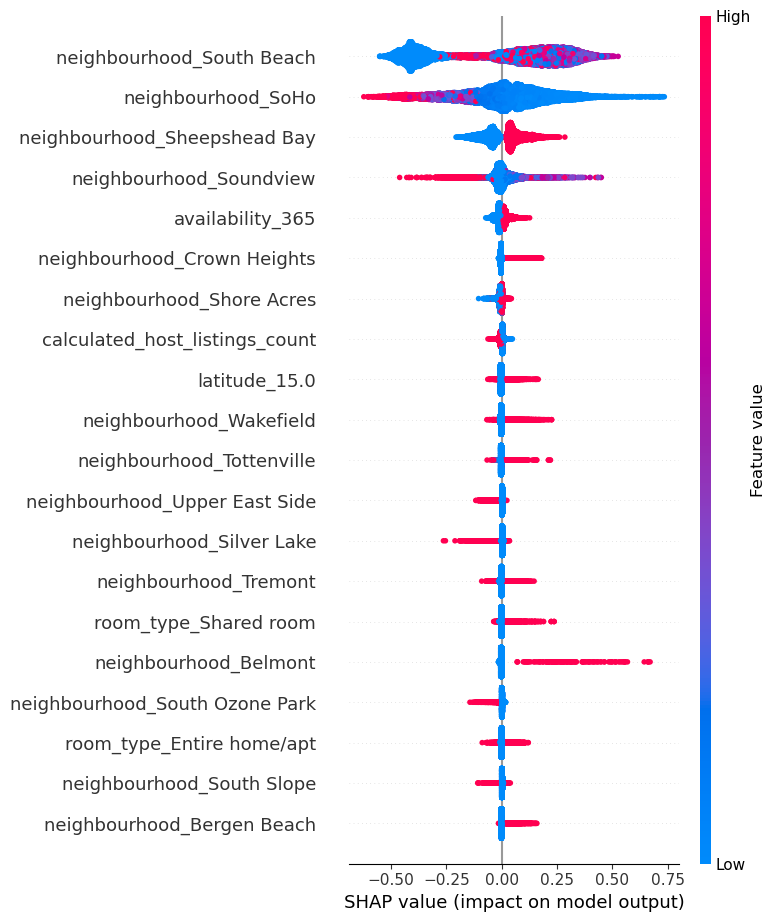

In [57]:
shap.summary_plot(train_lgbm_shap_values, X_train_enc, feature_names = feature_names)

The plot shows the most important features for predicting the class. It also shows the direction of how it's going to drive the prediction.

- Absence of the `neighbourhood_South Beach` on the listings seems to have smaller SHAP values for `reviews_per_month` and there's no particular relationship of SHAP values with the presence of neighbourhood_South Beach

- Presence of the `neighbourhood_South Beach` on listings seems to have bigger SHAP values for`reviews_per_month` and absence seems to have smaller SHAP values for `reviews_per_month` 

- Absence of the `neighbourhood_SoHo` on listings seems to have smaller SHAP values for`reviews_per_month` and presence seems to have bigger SHAP values for `reviews_per_month` 

<h3>🤯 SHAP Dependence Plot</h3>

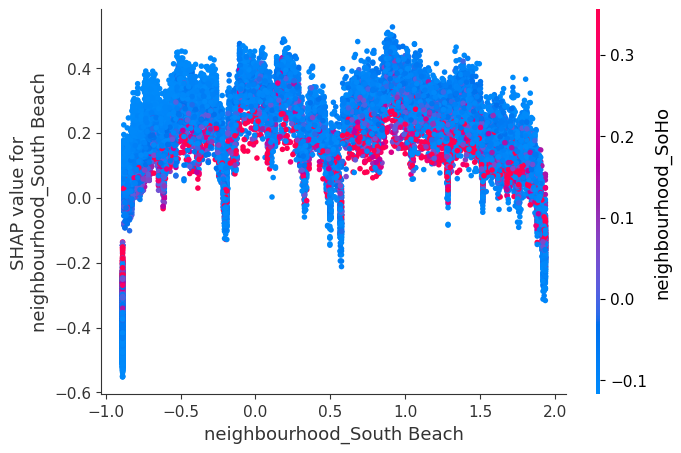

In [58]:
shap.dependence_plot('neighbourhood_South Beach', train_lgbm_shap_values, X_train_enc, feature_names = feature_names, interaction_index="auto")

The plot above shows effect of `neighbourhood_South Beach` on the prediction.

When `neighbourhood_South Beach` is 0.5 it's SHAP value is also mostly around 0 but when it's around 1 then the SHAP value varies, indicating a significant impact on the prediction.

The colour suggest that it might be related to `neighbourhood_SoHo`

<h3>📝 Summary</h3>


After looking at various plot and SHAP values we see that all the features have varying feature importances but none of them can be completely ignored and removed from our model as different examples  contribute to the predictions made by our model.

Therefore, it is a better idea to move forward without removing any features.

<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 12. Results on the test set <a name="12"></a>
<hr>

rubric={points:10}

**Your tasks:**

1. Try your best performing model on the test data and report test scores. 
2. Do the test scores agree with the validation scores from before? To what extent do you trust your results? Do you think you've had issues with optimization bias? 
3. Take one or two test predictions and explain these individual predictions (e.g., with SHAP force plots).  

<div class="alert alert-warning">
    
Solution_12
    
</div>

_Points:_ 10

<h3> 🙌 Trying the best performing model</h3>

In [59]:
final_results = {}
final_categorical_feats = ["neighbourhood_group", "neighbourhood", "room_type"]
final_numerical_feats = ["calculated_host_listings_count", "availability_365","minimum_price"]
final_discretization_feats = ["latitude", "longitude"]
final_drop_feats = ["id", "name", "host_id", "host_name", "last_review", "number_of_reviews"]

In [60]:
final_preprocessor = make_column_transformer(
    (OneHotEncoder(sparse_output = False, handle_unknown="ignore"), final_categorical_feats),
    (StandardScaler(), final_numerical_feats),
    (KBinsDiscretizer(n_bins=20, encode="onehot"), final_discretization_feats),
    ("drop", final_drop_feats)
)

In [61]:
final_ttr_LGBM = TransformedTargetRegressor(
    LGBMRegressor(num_leaves = best_num_leaves_lgbm,
                  n_estimators = best_n_estimators_lgbm,
                  max_depth = best_max_depth_lgbm,
                  random_state=123, 
                  verbose=-1), 
    func=np.log1p, inverse_func=np.expm1
)
final_pipe_lgbm = make_pipeline(
    final_preprocessor, final_ttr_LGBM
)


final_results["LGBM Regressor on Train/Cross Validation"] = mean_std_cross_val_scores(
    final_pipe_lgbm, X_train, y_train, return_train_score=True, scoring=mape_scorer
)
pd.DataFrame(final_results).T

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`


,fit_time,score_time,test_score,train_score
LGBM Regressor on Train/Cross Validation,1.956 (+/- 0.987),0.227 (+/- 0.054),-2.224 (+/- 0.073),-1.831 (+/- 0.009)


In [62]:
final_pipe_lgbm.fit(X_train, y_train)
mape_test = mean_absolute_percentage_error(y_test, final_pipe_lgbm.predict(X_test))
print(f'MAPE : {mape_test}')

MAPE : 2.232511531055077


<h3>✅ Trust of our results</h3>

In the case above, the cross-validation score (average of MAPEs for each fold) is 2.232 and the test score (MAPE on test set) is 2.2381. The two scores are quite close, which generally indicates that your model is not overfitting to the training data. Overfitting is when a model learns the training data too well, capturing noise along with underlying patterns, and performs poorly on unseen data.


Given the problem statement, it seems like we've done a good job of feature selection by excluding features that won’t be available for future listings or are unique identifiers.

<h3>🤯 SHAP Force Plot<h3>

In [63]:
final_pipe_lgbm.named_steps["transformedtargetregressor"].fit(X_train_enc, y_train)
final_lgbm_explainer = shap.TreeExplainer(final_pipe_lgbm.named_steps["transformedtargetregressor"].regressor_)
X_test_enc = pd.DataFrame(
    data = preprocessor.transform(X_test),
    columns = feature_names,
    index = X_test.index)
test_lgbm_shap_values = final_lgbm_explainer.shap_values(X_test_enc)
test_lgbm_shap_values

array([[-5.72352352e-05,  8.54305304e-03,  3.73746878e-02, ...,
         1.08039854e-04,  2.54460736e-04, -2.01259272e-03],
       [-2.22254813e-04, -6.52152543e-03, -1.30261777e-02, ...,
        -1.02169830e-03, -2.89874912e-04, -1.17037731e-03],
       [ 6.07732949e-05,  4.17829270e-03,  5.99978983e-02, ...,
         6.14303894e-04,  1.13163729e-04, -1.31780487e-03],
       ...,
       [-2.33779503e-04,  2.73364033e-03, -1.05942322e-02, ...,
        -1.63276961e-03, -2.40695857e-04, -1.53318648e-03],
       [-1.44732728e-04,  4.18263376e-03,  2.44951652e-02, ...,
        -1.18573670e-04, -1.44592052e-03, -1.24862953e-03],
       [-2.18308090e-04,  4.92415323e-03,  1.53942932e-02, ...,
        -1.26187321e-03, -3.38839066e-04, -8.99484329e-04]])

In [64]:
test_shap_values = pd.DataFrame(train_lgbm_shap_values, columns=feature_names)
test_shap_values

,minimum_price,calculated_host_listings_count,availability_365,latitude_0.0,latitude_1.0,latitude_2.0,latitude_3.0,latitude_4.0,latitude_5.0,latitude_6.0,...,neighbourhood_Whitestone,neighbourhood_Williamsbridge,neighbourhood_Williamsburg,neighbourhood_Windsor Terrace,neighbourhood_Woodhaven,neighbourhood_Woodlawn,neighbourhood_Woodside,room_type_Entire home/apt,room_type_Private room,room_type_Shared room
0,-0.000313,-0.004822,-0.008800,-0.000252,-0.000255,0.0,0.0,0.0,0.000034,0.000469,...,0.000170,0.001572,-0.000052,0.000013,-0.000063,-0.000952,0.000062,-0.000840,-0.000874,-0.001580
1,-0.000131,-0.015951,-0.026303,-0.000192,-0.000078,0.0,0.0,0.0,0.000037,0.000744,...,-0.000556,0.002547,-0.000417,0.000571,-0.000122,-0.003028,-0.000940,-0.000390,-0.001122,-0.002265
2,-0.000061,-0.009183,-0.045802,-0.000449,-0.000068,0.0,0.0,0.0,0.000060,0.001260,...,0.000248,-0.001755,-0.000466,0.000136,-0.001248,-0.001220,-0.000043,-0.000971,-0.000305,-0.000877
3,-0.000115,-0.009992,-0.016448,-0.001291,-0.000092,0.0,0.0,0.0,0.000034,0.000253,...,0.000178,-0.001423,-0.000381,-0.004512,0.000115,-0.000913,0.000131,-0.000058,-0.000730,-0.001304
4,-0.000487,0.003602,0.008649,-0.000293,-0.000239,0.0,0.0,0.0,0.000036,-0.000266,...,-0.000576,0.002393,0.000148,0.000027,-0.000515,-0.000937,-0.000045,-0.002847,-0.000163,-0.001732
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27231,0.000690,-0.003223,-0.014976,-0.002830,0.000015,0.0,0.0,0.0,0.000057,0.000399,...,0.000463,-0.002023,-0.000163,0.000593,-0.000129,-0.002338,0.000350,0.001942,-0.000989,-0.000464
27232,-0.000326,0.002421,0.021273,-0.000399,-0.000096,0.0,0.0,0.0,0.000032,-0.000170,...,0.000084,0.000205,-0.000007,0.000280,0.000501,-0.000446,-0.000150,-0.001770,-0.001746,-0.001269
27233,-0.000223,0.003389,0.009741,-0.000278,-0.000242,0.0,0.0,0.0,0.000036,0.000454,...,0.000047,-0.000250,0.000114,-0.000271,0.000224,-0.000894,0.000060,-0.000300,-0.000592,-0.001494
27234,0.002187,0.005573,-0.011807,-0.001705,-0.000569,0.0,0.0,0.0,0.000031,0.000069,...,0.000443,-0.002886,-0.000140,0.001063,0.000212,-0.000911,0.002222,-0.004604,0.000934,0.034956


We will be looking at the SHAP force plots for the example with most error and least error.

Actual value: 12.54
Predicted value: 0.3605797970586898
Raw Predicted value: 2.6520174879849363


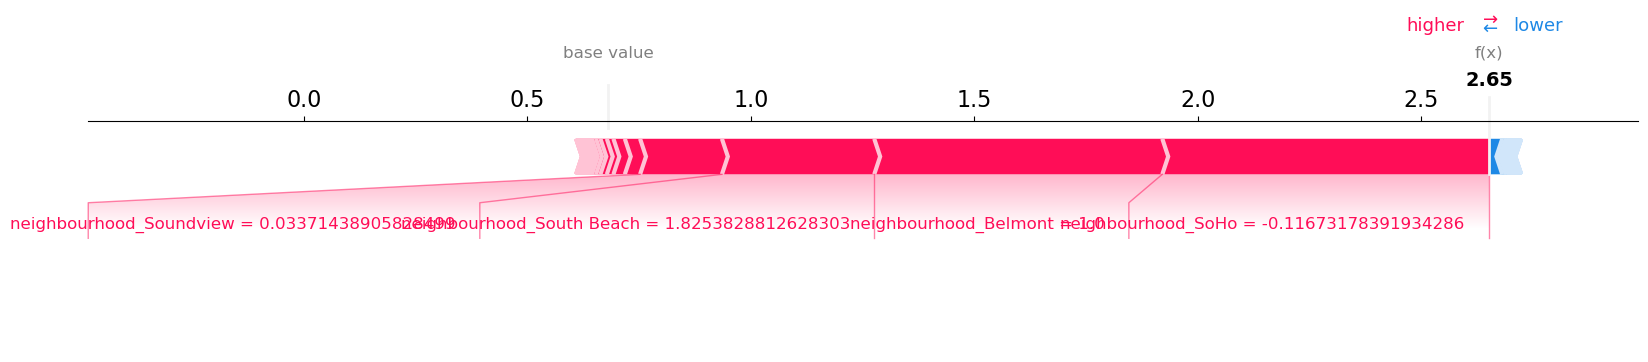

In [65]:
y_pred = final_pipe_lgbm.predict(X_test)

# Calculate squared errors
squared_errors = (y_test - y_pred)**2

high_error_index = np.argmax(squared_errors)

raw_score_output_max = final_pipe_lgbm.named_steps["transformedtargetregressor"].regressor_.predict(X_test_enc, raw_score = True)[high_error_index]

# Print actual and predicted values for this instance
print(f'Actual value: {y_test.iloc[high_error_index]}')
print(f'Predicted value: {y_pred[high_error_index]}')
print(f'Raw Predicted value: {raw_score_output_max}')


shap.force_plot(final_lgbm_explainer.expected_value,
                test_lgbm_shap_values[high_error_index],
                X_test_enc.iloc[high_error_index], 
                matplotlib = True)



We can see that the difference between the actual value and Raw predicted value is quite high. From the force plot, we see many features like ```neighbourhood_belmont```, ```neighbourhood_SOHO```, etc. contribute very highly towards increasing our raw model output. Without any knowledge of the post processing that LGBM Regressor does on the raw score, it is hard to predict what went wrong. But, one thing is clear that our model is not accurately assigning importances to these features in this example.

Actual value: 1.21
Predicted value: 1.2109434002420507
Raw Predicted value: 0.8417204770440864


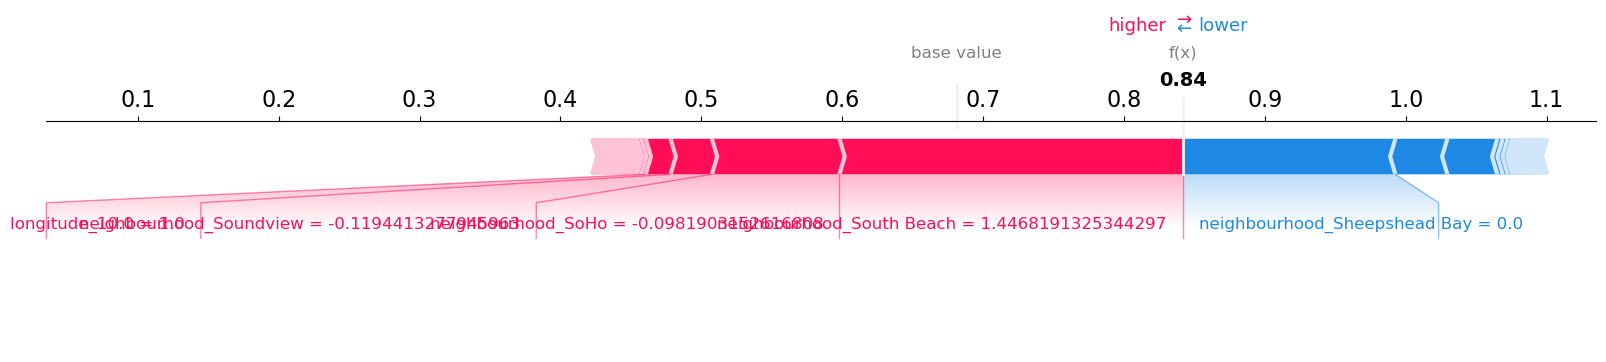

In [66]:
least_error_index = np.argmin(squared_errors)

raw_score_output_least = final_pipe_lgbm.named_steps["transformedtargetregressor"].regressor_.predict(X_test_enc, raw_score = True)[least_error_index]

# Print actual and predicted values for this instance
print(f'Actual value: {y_test.iloc[least_error_index]}')
print(f'Predicted value: {y_pred[least_error_index]}')
print(f'Raw Predicted value: {raw_score_output_least}')


shap.force_plot(final_lgbm_explainer.expected_value,
                test_lgbm_shap_values[least_error_index],
                X_test_enc.iloc[least_error_index], 
                matplotlib = True)

We can see that the difference between the actual value and predicted value is quite low. From the force plot, we see that  ```neighbourhood_St. George``` contributed toward increasing the score while ```neighbourhood_SOHO``` contributes towards decreasing our raw model output. In this example, our model has perfomed quite well.

<!-- BEGIN QUESTION -->

## 13. Summary of results <a name="13"></a>
<hr>
rubric={points:12}

Imagine that you want to present the summary of these results to your boss and co-workers. 

**Your tasks:**

1. Create a table summarizing important results. 
2. Write concluding remarks.
3. Discuss other ideas that you did not try but could potentially improve the performance/interpretability . 
3. Report your final test score along with the metric you used at the top of this notebook in the [Submission instructions section](#si).

<div class="alert alert-warning">
    
Solution_13
    
</div>

_Points:_ 12

<h3>Important Results</h3>

| Model | Summary 
| --- | ----------- 
| ```DummyRegressor``` | We see that the scores predicted by `DummyRegressor` with strategy = "mean" gives constant values regardeless of what test features are. That is why we see the mean `test_score` and `train_score` are same with a slight difference in standard deviation due to cross-validation. 
| ```Ridge``` | Despite the fit time being slightly more than baseline model we would still prefer this over that as the test_score has significantly high MAPE of <b>-4.002($\pm 0.071$)</b> .As well as after doing some hyperparameter optimization for $\alpha$ we get it equal to the default value i.e., 1. There's no overestimation here as the gap between `train_score` and `test_score` isn't significant. 
| ```DecisionTreeRegressor``` | The `fit_time` for DecisionTreeRegressor is significantly higher than LinearModel as using default values lead to a fully grown and unpruned trees which can lead to very large trees. After optimizing the model, we can see the score increases by quite a lot, but it is still not the best.
| ```RandomForestRegressor``` | As all our trees are fully grown and unpruned it's definitely overfitting on the training set which is evident from the significant gap between `test_score` and `train_score`. It's score is better than the baseline model, the linear model and decision Tree as well before it is optimized. 
| ```LGBMRegressor``` | The ```LGBMRegressor``` is the best model so far. After fitting some feature selection model, we see that the base model performs better without them. Further, We see that after optimizing the model, our accuracy increases slightly. This would be helpful when we encounter real world data.

<h3> Concluding Remarks</h3>



<h4>Initial Models Inspection through Cross-Validation</h4>

From the table below we can see that our best performing model is the `LGBMRegressor`. After using RFECV as well as SelectionFromModel feature selection tools we see that our base model performs the best with the cross_validation score of $2.274$. 

Therefore, that is the model we used to do hyper-parameter optimization.

In [67]:
pd.DataFrame(results).T

,fit_time,score_time,test_score,train_score
Dummy,0.187 (+/- 0.076),0.048 (+/- 0.008),-6.782 (+/- 0.109),-6.782 (+/- 0.023)
LinearModel,0.238 (+/- 0.012),0.049 (+/- 0.002),-4.002 (+/- 0.071),-3.952 (+/- 0.013)
DecisionTreeRegressor,1.055 (+/- 0.039),0.041 (+/- 0.003),-3.106 (+/- 0.141),-0.086 (+/- 0.003)
Random forests,37.391 (+/- 8.896),0.213 (+/- 0.031),-2.310 (+/- 0.073),-0.770 (+/- 0.005)
LGBM Regressor,0.490 (+/- 0.248),0.080 (+/- 0.012),-2.274 (+/- 0.073),-2.133 (+/- 0.005)
LGBM with RFECV,200.482 (+/- 25.716),0.100 (+/- 0.014),-2.973 (+/- 0.115),-2.830 (+/- 0.028)
LGBM with SelectFromModel,1.630 (+/- 1.568),0.173 (+/- 0.102),-3.679 (+/- 0.112),-3.597 (+/- 0.024)


<h4>Cross Validation Scores on Non-Linear Models with Hyper-Parameter Optimization</h4>

After performing hyperparameter optimization, we see that our results have improved slightly. Although it seems insignificant at the moment but when we encounter real world data it would be helpful! 

We also optimized `DecisionTreeRegressor` to make sure `LGBMRegressor` is still the best model. Although the validation score decrease by a lot it is still larger than the validation score of `LGBMRegressor`. 

We did not go ahead with optimizing `RandomForestRegressor` as it leads to really high computation time as it would optimizate hyperparameter for 10 models with each model making approximately 100 trees. This would make the fit_time really high i.e., not feasible with our machines.

Additionally,  after looking at various plot and SHAP values we see that all the features have varying feature importances but none of them can be completely ignored and removed from our model as different examples  contribute to the predictions made by our model.

Therefore, this the model we used to perform scoring on the `test_set`

In [68]:
pd.DataFrame(results_hyperparams).T

,fit_time,score_time,test_score,train_score
LGBM Regressor,0.899 (+/- 0.493),0.155 (+/- 0.003),-2.224 (+/- 0.073),-1.831 (+/- 0.009)
Decision Tree Regressor,0.726 (+/- 0.159),0.037 (+/- 0.002),-2.415 (+/- 0.077),-1.940 (+/- 0.007)


<h4>Score on Test Set with the Best Model</h4>

As we can see our validation score and test score are quite close ($0.0061$) indicating that our model is not overfitting and would generalize well when deployed. 

In [69]:
display(pd.DataFrame(final_results).T)
print("LGBM Regressor's Score on Test Set : " , mape_test)

,fit_time,score_time,test_score,train_score
LGBM Regressor on Train/Cross Validation,1.956 (+/- 0.987),0.227 (+/- 0.054),-2.224 (+/- 0.073),-1.831 (+/- 0.009)


LGBM Regressor's Score on Test Set :  2.232511531055077


<h3>Improving the Performance</h3>

Even though our performance was quite good, we still feel we could have made the model better in the following areas:

- Using other metrics such as ```RMSE``` and ```R^2``` to measure our models performance before testing. MAPE is a good metric but different metrics give different insights into how the model is performing. Perhaps, with more knowledge, we can use mutliple metrics to judge our model

- Due to time constraints, we could not do this but making another dataset in which we replaced the NaN values with 0 instead of removing it completely. More data is always helpful when it comes to regression models and perhaps, adding those values in would have trained the model better.

- Performing more rigorous feature engineering. our ```minimum_price``` turned out to be quite important for the model. Perhaps, spending some time to think of some more features to be added or researching more ways to engineer new features might have made our model better.

<h3>Test Score</h3>

As seen below, we have reported our test score using ```MAPE```, which was the metric we chose at the beginning.

In [70]:
print(f'MAPE : {mape_test}')

MAPE : 2.232511531055077


<!-- BEGIN QUESTION -->

## (Challenging) 14. Your takeaway <a name="15"></a>
<hr>
rubric={points:2}

**Your tasks:**

What is your biggest takeaway from the supervised machine learning material we have learned so far? Please write thoughtful answers.  

<div class="alert alert-warning">
    
Solution_14
    
</div>

_Points:_ 2

Supervised machine learning highlights the importance of data quality, feature engineering, and model selection. Ethical considerations like bias and fairness are crucial. The field emphasizes the need for explainable models and thoughtful selection of evaluation metrics. Continuous learning and adaptability to evolving techniques define success in this dynamic domain.

Perhaps, by the end of this course, we will have a better understanding of the aspects considered in real world model building.

<!-- END QUESTION -->

<br><br>

**Before submitting your assignment, please make sure you have followed all the instructions in the Submission instructions section at the top.**

This was a tricky one but you did it! Have a great weekend! 

![](img/eva-well-done.png)